In [162]:
pip install rapidfuzz

In [163]:
pip install --upgrade gradio

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2023 December

In [166]:
path = "/content/drive/MyDrive/diploma/2023_dec_raw.csv"
dou_2023_dec= pd.read_csv(path, sep=',')
dou_2023_dec .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12074 entries, 0 to 12073
Data columns (total 31 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Timestamp                                                                       12074 non-null  object 
 1   Ваша основна зайнятість в ІТ зараз...                                           12074 non-null  object 
 2   Зарплата / дохід у $$$ за місяць, лише ставка 
ЧИСТИМИ - після сплати податків  12074 non-null  float64
 3   Оберіть вашу основну посаду                                                     12074 non-null  object 
 4   Ваш тайтл на цій посаді                                                         12074 non-null  object 
 5   Вкажіть вашу спеціалізацію - Game Design                                        65 non-null     object 
 6   Вкажіть вашу с

In [167]:
dou_2023_dec.rename(columns={
    'Timestamp': 'timestamp',
    'Ваша основна зайнятість в ІТ зараз...': 'employmentType',
    'Зарплата / дохід у $$$ за місяць, лише ставка \nЧИСТИМИ - після сплати податків': 'salary',
    'Оберіть вашу основну посаду': 'mainPosition',
    'Ваш тайтл на цій посаді': 'jobTitle',
    'Вкажіть вашу спеціалізацію - Game Design': 'specializationGameDesign',
    'Вкажіть вашу спеціалізацію - Sound': 'specializationSound',
    'Вкажіть вашу спеціалізацію - QA': 'specializationQA',
    'Оберіть вашу посаду - Design': 'positionDesign',
    'GameDev розробники - оберіть вашу спеціалізацію': 'specializationGameDev',
    'Ваша посада - Marketing': 'positionMarketing',
    'Оберіть вашу посаду - HR': 'positionHR',
    'Ваша посада - PM': 'positionPM',
    'Ваша посада - Analyst': 'positionAnalyst',
    'Ваша посада - DS': 'positionDS',
    'Ваша посада - DevOps': 'positionDevOps',
    'Ваша посада - Top management': 'positionTopManagement',
    'Ваша спеціалізація - Support': 'specializationSupport',
    'Чи використовуєте ви у своїй роботі мови програмування (одну чи декілька)?': 'usesProgrammingLanguages',
    'Основна мова програмування': 'mainProgrammingLanguage',
    'Вкажіть вашу основну спеціалізацію': 'mainSpecialization',
    'В якій сфері проєкт, в якому ви зараз працюєте?': 'projectDomain',
    'Основний напрям роботи компанії, в якій працюєте': 'companyMainArea',
    'Кількість спеціалістів у вашій компанії (в Україні/з України)': 'companySizeUA',
    'Загальний стаж роботи за нинішньою ІТ-спеціальністю': 'experience',
    'Яка у вас освіта?': 'educationLevel',
    'Знання англійської мови': 'englishProficiency',
    'Де ви зараз живете? ': 'currentLocation',
    'В якій області ви зараз живете?': 'currentRegion',
    'Ваша стать': 'gender',
    'Ваш вік': 'age'
}, inplace=True)


In [168]:
dou_2023_dec.head()

,timestamp,employmentType,salary,mainPosition,jobTitle,specializationGameDesign,specializationSound,specializationQA,positionDesign,specializationGameDev,...,projectDomain,companyMainArea,companySizeUA,experience,educationLevel,englishProficiency,currentLocation,currentRegion,gender,age
0,12/4/2023 9:07:12,Працюю full-time в ІТ-компанії чи ІТ-відділі,4500.0,Software Engineer / Programmer,Senior,NaN,NaN,NaN,NaN,NaN,...,E-commerce,Аутстафінгова,до 1000,6.0,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Суми чи область,Чоловік,28
1,12/4/2023 9:07:50,Працюю full-time в ІТ-компанії чи ІТ-відділі,7000.0,"Data Science, Machine Learning, AI, Big Data, ...",Tech Lead,NaN,NaN,NaN,NaN,NaN,...,"Big Data, Data Science, Gambling",Продуктова,до 1000,5.0,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Київ чи область,Чоловік,36
2,12/4/2023 9:08:11,Працюю full-time в ІТ-компанії чи ІТ-відділі,1750.0,Software Engineer / Programmer,Junior,NaN,NaN,NaN,NaN,NaN,...,Insurance,Аутсорсингова,до 1000,2.0,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Харків чи область,Чоловік,34
3,12/4/2023 9:08:42,Працюю full-time в ІТ-компанії чи ІТ-відділі,3560.0,"QA / AQA Engineer (Junior, Middle, Senior, Tea...",Senior,NaN,NaN,Manual QA,NaN,NaN,...,"E-commerce, Legal, Public services / Government",Продуктова,до 1000,6.0,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Львів чи область,Чоловік,37
4,12/4/2023 9:09:23,Працюю full-time в ІТ-компанії чи ІТ-відділі,2750.0,Software Engineer / Programmer,Senior,NaN,NaN,NaN,NaN,NaN,...,Retail,Продуктова,до 1000,3.0,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Київ чи область,Чоловік,34


In [169]:
dou_2023_dec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12074 entries, 0 to 12073
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   timestamp                 12074 non-null  object 
 1   employmentType            12074 non-null  object 
 2   salary                    12074 non-null  float64
 3   mainPosition              12074 non-null  object 
 4   jobTitle                  12074 non-null  object 
 5   specializationGameDesign  65 non-null     object 
 6   specializationSound       2 non-null      object 
 7   specializationQA          2205 non-null   object 
 8   positionDesign            478 non-null    object 
 9   specializationGameDev     241 non-null    object 
 10  positionMarketing         252 non-null    object 
 11  positionHR                417 non-null    object 
 12  positionPM                752 non-null    object 
 13  positionAnalyst           430 non-null    object 
 14  positi

# 2024 June

In [170]:
path = "/content/drive/MyDrive/diploma/2024_june_raw.csv"
dou_2024= pd.read_csv(path, sep=',')
dou_2024.head()

,Timestamp,Ваша основна зайнятість в ІТ зараз...,"Зарплата / дохід в ІТ у $$$ за місяць, лише ставка \nЧИСТИМИ - після сплати податків",Оберіть вашу основну посаду,Ваш тайтл на цій посаді,Вкажіть вашу спеціалізацію - Game design,Вкажіть вашу спеціалізацію - Sound,Вкажіть вашу спеціалізацію - QA,Оберіть вашу посаду - Design,Оберіть вашу посаду - Art and Animation,...,"В якій сфері проєкт, в якому ви зараз працюєте?","Основний напрям роботи компанії, в якій працюєте",Кількість спеціалістів у вашій компанії (з України),Загальний стаж роботи за нинішньою ІТ-спеціальністю,Яка у вас освіта?,Знання англійської мови,В якій області ви зараз живете?,Ваша стать,Ваш вік (повних років),Де живуть
0,5/27/2024 9:30,Працюю full-time в ІТ-компанії чи ІТ-відділі,4700.0,Software Engineer,Senior,NaN,NaN,NaN,NaN,NaN,...,Retail,Аутстафінгова,5. до 1000,5.0,"5. Вища (бакалавр, спеціаліст, магістр) - одна...",5. Upper-Intermediate,Львів чи область,Чоловік,24.0,В Україні
1,5/27/2024 9:30,Працюю full-time в ІТ-компанії чи ІТ-відділі,1700.0,"QA / AQA / QC Engineer (Junior, Middle, Senior...",Middle,NaN,NaN,Automation QA,NaN,NaN,...,Media,Сервісна (аутсорсингова),6. понад 1000,2.0,"5. Вища (бакалавр, спеціаліст, магістр) - одна...",4. Intermediate,Київ чи область,Чоловік,31.0,В Україні
2,5/27/2024 9:30,Працюю full-time в ІТ-компанії чи ІТ-відділі,3500.0,Project/Product/Program/Delivery/Engineering M...,Немає тайтлу,NaN,NaN,NaN,NaN,NaN,...,Blockchain,Продуктова,4. до 200,3.0,"5. Вища (бакалавр, спеціаліст, магістр) - одна...",6. Advanced,Київ чи область,Жінка,26.0,В Україні
3,5/27/2024 9:31,Працюю full-time в ІТ-компанії чи ІТ-відділі,3100.0,Software Engineer,Senior,NaN,NaN,NaN,NaN,NaN,...,Mobile,Сервісна (аутсорсингова),5. до 1000,6.0,"5. Вища (бакалавр, спеціаліст, магістр) - одна...",5. Upper-Intermediate,Тернопіль чи область,Чоловік,28.0,В Україні
4,5/27/2024 9:32,Працюю full-time в ІТ-компанії чи ІТ-відділі,7000.0,Project/Product/Program/Delivery/Engineering M...,Немає тайтлу,NaN,NaN,NaN,NaN,NaN,...,"High Load Systems, Інша",Продуктова,3. до 50,2.0,"5. Вища (бакалавр, спеціаліст, магістр) - одна...",6. Advanced,Київ чи область,Чоловік,35.0,В Україні


In [171]:
dou_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11469 entries, 0 to 11468
Data columns (total 32 columns):
 #   Column                                                                               Non-Null Count  Dtype  
---  ------                                                                               --------------  -----  
 0   Timestamp                                                                            11468 non-null  object 
 1   Ваша основна зайнятість в ІТ зараз...                                                11468 non-null  object 
 2   Зарплата / дохід в ІТ у $$$ за місяць, лише ставка 
ЧИСТИМИ - після сплати податків  11468 non-null  float64
 3   Оберіть вашу основну посаду                                                          11468 non-null  object 
 4   Ваш тайтл на цій посаді                                                              11468 non-null  object 
 5   Вкажіть вашу спеціалізацію - Game design                                             84 

In [172]:
dou_2024.rename(columns={
    'Timestamp': 'timestamp',
    'Ваша основна зайнятість в ІТ зараз...': 'employmentType',
    'Зарплата / дохід в ІТ у $$$ за місяць, лише ставка \nЧИСТИМИ - після сплати податків': 'salary',
    'Оберіть вашу основну посаду': 'mainPosition',
    'Ваш тайтл на цій посаді': 'jobTitle',
    'Вкажіть вашу спеціалізацію - Game design': 'specializationGameDesign',
    'Вкажіть вашу спеціалізацію - Sound': 'specializationSound',
    'Вкажіть вашу спеціалізацію - QA': 'specializationQA',
    'Оберіть вашу посаду - Design': 'positionDesign',
    'Якщо ви працюєте в GameDev,  оберіть вашу спеціалізацію': 'specializationGameDev',
    'Ваша посада - Marketing': 'positionMarketing',
    'Оберіть вашу посаду - HR': 'positionHR',
    'Ваша посада - PM': 'positionPM',
    'Ваша посада - Analyst': 'positionAnalyst',
    'Ваша посада - DS': 'positionDS',
    'Ваша посада- DevOps': 'positionDevOps',
    'Ваша посада - Top management': 'positionTopManagement',
    'Ваша спеціалізація - Support': 'specializationSupport',
    'Чи використовуєте ви у своїй роботі мови програмування (одну чи декілька)?': 'usesProgrammingLanguages',
    'Основна мова програмування': 'mainProgrammingLanguage',
    'Вкажіть вашу основну спеціалізацію': 'mainSpecialization',
    'В якій сфері проєкт, в якому ви зараз працюєте?': 'projectDomain',
    'Основний напрям роботи компанії, в якій працюєте': 'companyMainArea',
    'Кількість спеціалістів у вашій компанії (з України)': 'companySizeUA',
    'Загальний стаж роботи за нинішньою ІТ-спеціальністю': 'experience',
    'Яка у вас освіта?': 'educationLevel',
    'Знання англійської мови': 'englishProficiency',
    'Де живуть': 'currentLocation',
    'В якій області ви зараз живете?': 'currentRegion',
    'Ваша стать': 'gender',
    'Ваш вік (повних років)': 'age'
}, inplace=True)


In [173]:
columns_to_drop = ['Ваша посада - C-level', 'Оберіть вашу посаду - Art and Animation']
dou_2024 = dou_2024.drop(columns=columns_to_drop)

# 2023 June

In [174]:
path = "/content/drive/MyDrive/diploma/2023_june_raw.csv"
dou_2023_june= pd.read_csv(path, sep=';')
dou_2023_june.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14059 entries, 0 to 14058
Data columns (total 31 columns):
 #   Column                                                                      Non-Null Count  Dtype 
---  ------                                                                      --------------  ----- 
 0   Timestamp                                                                   14059 non-null  object
 1   Ваша основна зайнятість в ІТ зараз...                                       14059 non-null  object
 2   Зарплата / дохід у $$$ за місяць, лише ставка після сплати податків         13970 non-null  object
 3   Спеціалізація                                                               13985 non-null  object
 4   Ваш тайтл на цій посаді                                                     13985 non-null  object
 5   Вкажіть вашу спеціалізацію Game Design                                      68 non-null     object
 6   Вкажіть вашу спеціалізацію Sound                      

In [175]:
dou_2023_june.rename(columns={
    'Timestamp': 'timestamp',
    'Ваша основна зайнятість в ІТ зараз...': 'employmentType',
    'Зарплата / дохід у $$$ за місяць, лише ставка після сплати податків': 'salary',
    'Спеціалізація': 'mainPosition',#???
    'Ваш тайтл на цій посаді': 'jobTitle',
    'Вкажіть вашу спеціалізацію Game Design': 'specializationGameDesign',
    'Вкажіть вашу спеціалізацію Sound': 'specializationSound',
    'Вкажіть вашу спеціалізацію - QA': 'specializationQA',
    'Оберіть вашу посаду Designer / Artist': 'positionDesign',
    'Якщо ви працюєте в GameDev,  оберіть вашу спеціалізацію': 'specializationGameDev',
    'Ваша посада Marketing': 'positionMarketing',
    'Оберіть вашу посаду HR': 'positionHR',
    'Ваша посада - PM': 'positionPM',
    'Ваша посада Analyst': 'positionAnalyst',
    'Ваша посада Data Science': 'positionDS',
    'Ваша посада DevOps, SRE': 'positionDevOps',
    'Ваша посада Management': 'positionTopManagement',
    'Ваша спеціалізація Support': 'specializationSupport',
    'Чи використовуєте ви у своїй роботі мови програмування (одну чи декілька)?': 'usesProgrammingLanguages',
    'Основна мова програмування': 'mainProgrammingLanguage',
    'Вкажіть вашу основну спеціалізацію': 'mainSpecialization',
    'В якій сфері проєкт, в якому ви зараз працюєте?': 'projectDomain',
    'Основний напрям роботи компанії, в якій працюєте': 'companyMainArea',
    'Кількість спеціалістів у вашій компанії (в Україні/з України)': 'companySizeUA',
    'Загальний стаж роботи за нинішньою ІТ-спеціальністю': 'experience',
    'Яка у вас освіта?': 'educationLevel',
    'Знання англійської мови': 'englishProficiency',
    'Де ви зараз живете? ': 'currentLocation',
    'В якій області ви зараз живете?': 'currentRegion',
    'Ваша стать': 'gender',
    'Ваш вік': 'age'
}, inplace=True)
dou_2023_june.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14059 entries, 0 to 14058
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   timestamp                  14059 non-null  object
 1   employmentType             14059 non-null  object
 2   salary                     13970 non-null  object
 3   mainPosition               13985 non-null  object
 4   jobTitle                   13985 non-null  object
 5   specializationGameDesign   68 non-null     object
 6   specializationSound        4 non-null      object
 7   specializationQA           2762 non-null   object
 8   positionDesign             507 non-null    object
 9   specializationGameDev      268 non-null    object
 10  positionMarketing          292 non-null    object
 11  positionHR                 632 non-null    object
 12  positionTopManagement      894 non-null    object
 13  positionAnalyst            526 non-null    object
 14  positi

In [176]:
columns_to_drop = ['Ваша посада CTO, Director']
dou_2023_june = dou_2023_june.drop(columns=columns_to_drop)

In [177]:
dou_2023_june['salary'] = pd.to_numeric(dou_2023_june['salary'], errors='coerce')
dou_2023_june['age'] = pd.to_numeric(dou_2023_june['age'], errors='coerce')

# Merging datasets

In [178]:
print(dou_2023_dec.columns)
print(dou_2024.columns)
print(dou_2023_june.columns)


Index(['timestamp', 'employmentType', 'salary', 'mainPosition', 'jobTitle',
       'specializationGameDesign', 'specializationSound', 'specializationQA',
       'positionDesign', 'specializationGameDev', 'positionMarketing',
       'positionHR', 'positionPM', 'positionAnalyst', 'positionDS',
       'positionDevOps', 'positionTopManagement', 'specializationSupport',
       'usesProgrammingLanguages', 'mainProgrammingLanguage',
       'mainSpecialization', 'projectDomain', 'companyMainArea',
       'companySizeUA', 'experience', 'educationLevel', 'englishProficiency',
       'currentLocation', 'currentRegion', 'gender', 'age'],
      dtype='object')
Index(['timestamp', 'employmentType', 'salary', 'mainPosition', 'jobTitle',
       'specializationGameDesign', 'specializationSound', 'specializationQA',
       'positionDesign', 'specializationGameDev', 'positionMarketing',
       'positionHR', 'positionPM', 'positionAnalyst', 'positionDS',
       'positionDevOps', 'specializationSupport', '

In [179]:
columns_dec = set(dou_2023_dec.columns)
columns_2024 = set(dou_2024.columns)
columns_june = set(dou_2023_june.columns)


common_columns = columns_dec & columns_2024 & columns_june
print(f"Common columns: {common_columns}")

unique_dec = columns_dec - common_columns
unique_2024 = columns_2024 - common_columns
unique_june = columns_june - common_columns


print(f"Unique columns in dou_2023_dec: {unique_dec}")
print(f"Unique columns in dou_2024: {unique_2024}")
print(f"Unique columns in dou_2023_june: {unique_june}")


Common columns: {'specializationQA', 'mainSpecialization', 'educationLevel', 'salary', 'employmentType', 'specializationSound', 'positionDS', 'specializationSupport', 'companySizeUA', 'experience', 'positionDevOps', 'englishProficiency', 'positionMarketing', 'mainProgrammingLanguage', 'usesProgrammingLanguages', 'currentLocation', 'mainPosition', 'positionAnalyst', 'timestamp', 'jobTitle', 'currentRegion', 'specializationGameDesign', 'projectDomain', 'positionDesign', 'positionHR', 'companyMainArea', 'specializationGameDev', 'gender', 'age'}
Unique columns in dou_2023_dec: {'positionPM', 'positionTopManagement'}
Unique columns in dou_2024: {'positionPM'}
Unique columns in dou_2023_june: {'positionTopManagement'}


In [180]:
required_columns = [
    'projectDomain',
    'currentLocation',
    'mainSpecialization',
    'englishProficiency', 'companySizeUA', 'age',
    'gender', 'salary',
    'companyMainArea', 'experience',
    'mainPosition', 'currentRegion', 'employmentType',
    'educationLevel',
    'jobTitle'
]

# Selecting the required columns from each dataset
dou_2023_dec_filtered = dou_2023_dec[required_columns]
dou_2024_filtered = dou_2024[required_columns]
dou_2023_june_filtered = dou_2023_june[required_columns]

# Combining datasets
combined_data = pd.concat([dou_2023_dec_filtered, dou_2024_filtered,
                           dou_2023_june_filtered], ignore_index=True)

combined_data.info()

# Adding a data source
# dou_2023_dec_filtered['source'] = '2023_dec'
# dou_2024_filtered['source'] = '2024_june'
# dou_2023_june_filtered['source'] = '2023_june'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37602 entries, 0 to 37601
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   projectDomain       37527 non-null  object 
 1   currentLocation     37601 non-null  object 
 2   mainSpecialization  25167 non-null  object 
 3   englishProficiency  37527 non-null  object 
 4   companySizeUA       37527 non-null  object 
 5   age                 37600 non-null  float64
 6   gender              37601 non-null  object 
 7   salary              37495 non-null  float64
 8   companyMainArea     37527 non-null  object 
 9   experience          37527 non-null  object 
 10  mainPosition        37527 non-null  object 
 11  currentRegion       34828 non-null  object 
 12  employmentType      37601 non-null  object 
 13  educationLevel      37527 non-null  object 
 14  jobTitle            37527 non-null  object 
dtypes: float64(2), object(13)
memory usage: 4.3+ MB


In [181]:
combined_data.head()

,projectDomain,currentLocation,mainSpecialization,englishProficiency,companySizeUA,age,gender,salary,companyMainArea,experience,mainPosition,currentRegion,employmentType,educationLevel,jobTitle
0,E-commerce,В Україні,Front-end розробка,Upper-Intermediate,до 1000,28.0,Чоловік,4500.0,Аутстафінгова,6.0,Software Engineer / Programmer,Суми чи область,Працюю full-time в ІТ-компанії чи ІТ-відділі,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Senior
1,"Big Data, Data Science, Gambling",В Україні,"Робота з даними, аналіз даних",Upper-Intermediate,до 1000,36.0,Чоловік,7000.0,Продуктова,5.0,"Data Science, Machine Learning, AI, Big Data, ...",Київ чи область,Працюю full-time в ІТ-компанії чи ІТ-відділі,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Tech Lead
2,Insurance,В Україні,Back-end розробка,Upper-Intermediate,до 1000,34.0,Чоловік,1750.0,Аутсорсингова,2.0,Software Engineer / Programmer,Харків чи область,Працюю full-time в ІТ-компанії чи ІТ-відділі,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Junior
3,"E-commerce, Legal, Public services / Government",В Україні,QA,Upper-Intermediate,до 1000,37.0,Чоловік,3560.0,Продуктова,6.0,"QA / AQA Engineer (Junior, Middle, Senior, Tea...",Львів чи область,Працюю full-time в ІТ-компанії чи ІТ-відділі,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Senior
4,Retail,В Україні,Full Stack розробка,Upper-Intermediate,до 1000,34.0,Чоловік,2750.0,Продуктова,3.0,Software Engineer / Programmer,Київ чи область,Працюю full-time в ІТ-компанії чи ІТ-відділі,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Senior


In [182]:
# experience to int
combined_data['experience'] = pd.to_numeric(combined_data['experience'], errors='coerce').fillna(0).astype(int)

In [183]:
print(combined_data.isnull().sum())

projectDomain            75
currentLocation           1
mainSpecialization    12435
englishProficiency       75
companySizeUA            75
age                       2
gender                    1
salary                  107
companyMainArea          75
experience                0
mainPosition             75
currentRegion          2774
employmentType            1
educationLevel           75
jobTitle                 75
dtype: int64


In [184]:
# Check for duplicates
print(f"Number of duplicates: {combined_data.duplicated().sum()}")

# Remove duplicates
combined_data.drop_duplicates(inplace=True)
print(f"Dataset Shape after removing duplicates: {combined_data.shape}")

Number of duplicates: 101
Dataset Shape after removing duplicates: (37501, 15)


In [185]:
print(combined_data.isnull().sum())

projectDomain            25
currentLocation           1
mainSpecialization    12356
englishProficiency       25
companySizeUA            25
age                       2
gender                    1
salary                   57
companyMainArea          25
experience                0
mainPosition             25
currentRegion          2724
employmentType            1
educationLevel           25
jobTitle                 25
dtype: int64


# Сorrelation matrix

In [186]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

columns_to_encode = [
    'projectDomain', 'currentLocation', 'mainSpecialization', 'companyMainArea',
    'currentRegion', 'employmentType', 'jobTitle', 'mainPosition', 'englishProficiency',
    'companySizeUA', 'educationLevel', 'gender', 'experience','age'
]

combined_data2=combined_data.copy()

for column in columns_to_encode:
    combined_data2[column] = label_encoder.fit_transform(combined_data2[column])


combined_data2.head()

,projectDomain,currentLocation,mainSpecialization,englishProficiency,companySizeUA,age,gender,salary,companyMainArea,experience,mainPosition,currentRegion,employmentType,educationLevel,jobTitle
0,1354,0,53,10,8,12,1,4500.0,2,6,28,16,5,6,6
1,590,0,185,10,8,20,1,7000.0,4,5,4,7,5,6,8
2,2295,0,14,10,8,18,1,1750.0,1,2,28,19,5,6,3
3,1506,0,100,10,8,21,1,3560.0,4,6,23,10,5,6,6
4,2645,0,56,10,8,18,1,2750.0,4,3,28,7,5,6,6


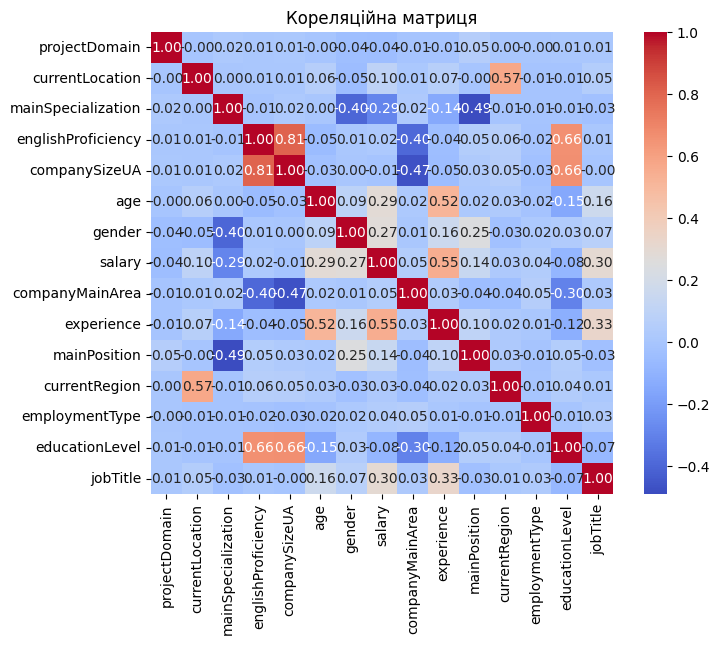

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = combined_data2.corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, square=True)
plt.title('Кореляційна матриця')
plt.show()

# Vizualizations

In [188]:
# Summary statistics for numerical features
combined_data[['age', 'salary','experience']].describe()

,age,salary,experience
count,37499.000000,37444.000000,37501.000000
mean,30.280941,3069.683682,4.824858
std,6.312035,2161.536993,3.603967
min,16.000000,50.000000,0.000000
25%,25.000000,1400.000000,2.000000
50%,30.000000,2600.000000,4.000000
75%,34.000000,4300.000000,7.000000
max,80.000000,36000.000000,15.000000


<ipython-input-189-10e8d165aa39>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(numerical_features[column], shade=True, color='skyblue')
<ipython-input-189-10e8d165aa39>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(numerical_features[column], shade=True, color='skyblue')
<ipython-input-189-10e8d165aa39>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(numerical_features[column], shade=True, color='skyblue')


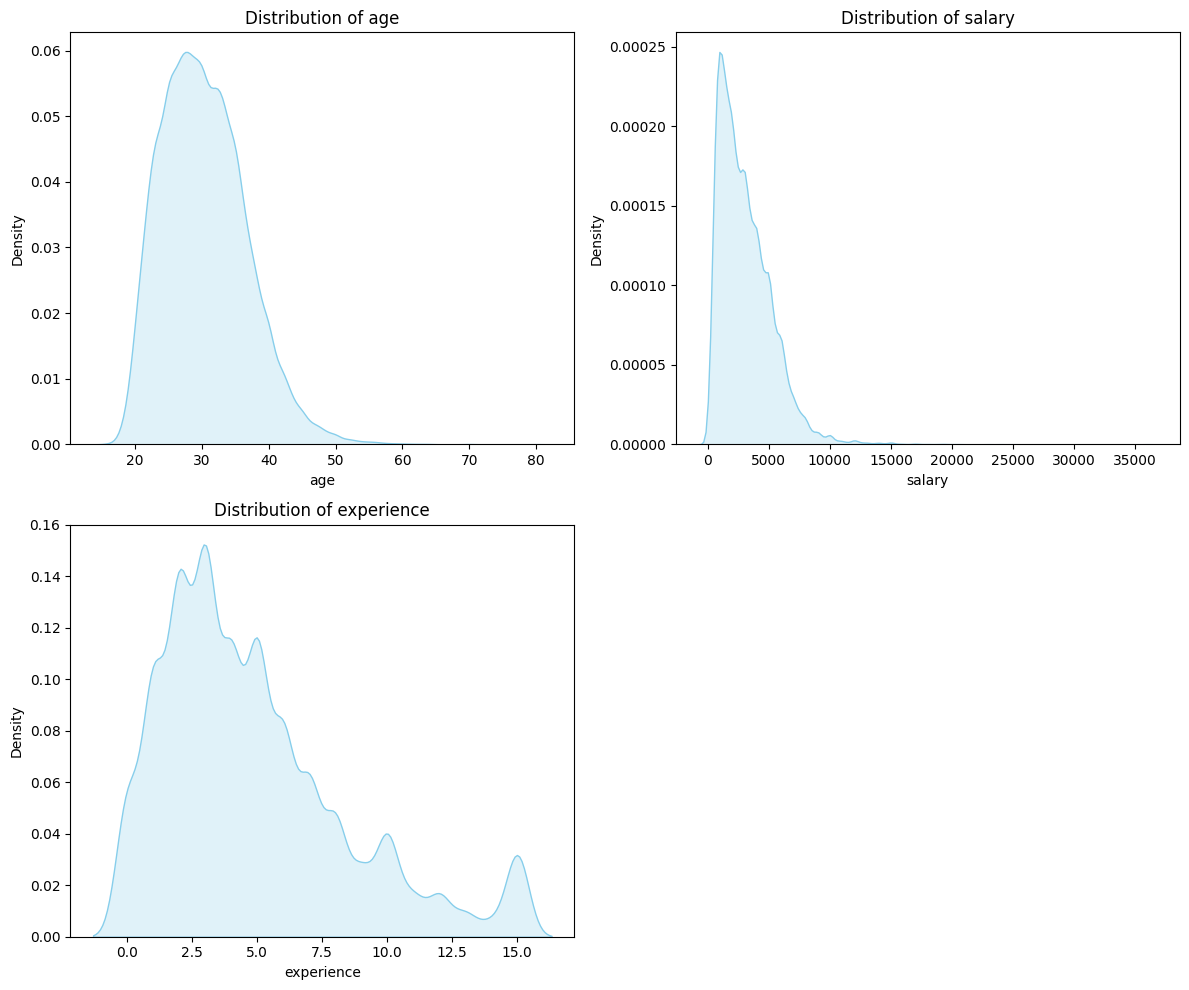

In [189]:
# Вибір числових стовпців
numerical_features = combined_data.select_dtypes(include=['float64', 'int64'])

# Побудова діаграм розподілу для кожної числової ознаки
plt.figure(figsize=(12, 10))
for i, column in enumerate(numerical_features.columns):
    plt.subplot(2, 2, i + 1)
    sns.kdeplot(numerical_features[column], shade=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

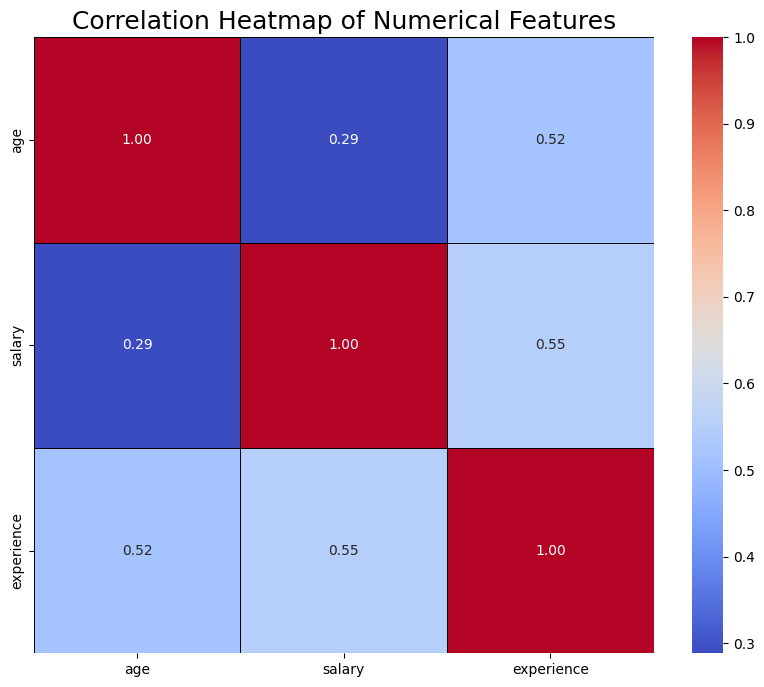

In [190]:

# Вибір числових стовпців
numerical_features = combined_data.select_dtypes(include=['float64', 'int64'])

# Обчислення кореляційної матриці
correlation_matrix = numerical_features.corr()

# Побудова теплової карти
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,  # Додає значення в клітини
    cmap='coolwarm',  # Колірна палетка
    fmt='.2f',  # Формат чисел
    linewidths=0.5,  # Ширина ліній між клітинами
    linecolor='black'  # Колір ліній між клітинами
)

plt.title('Correlation Heatmap of Numerical Features', fontsize=18)
plt.show()

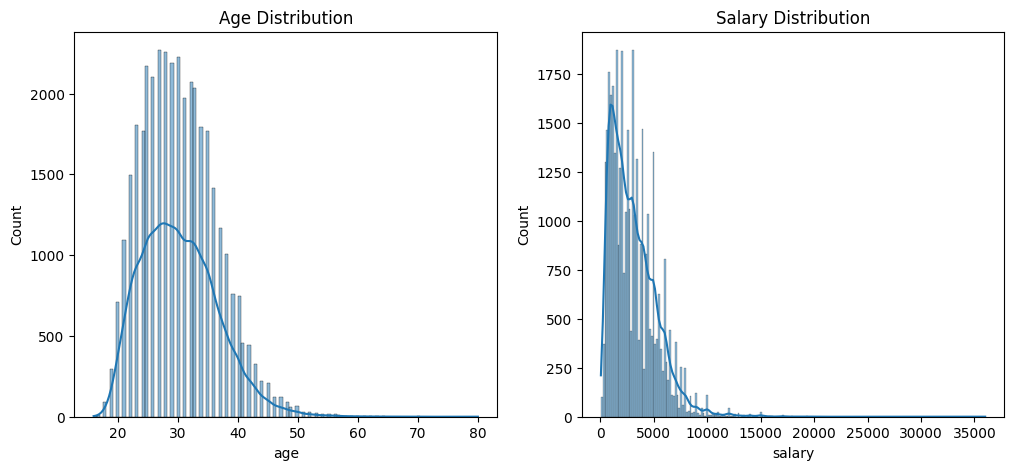

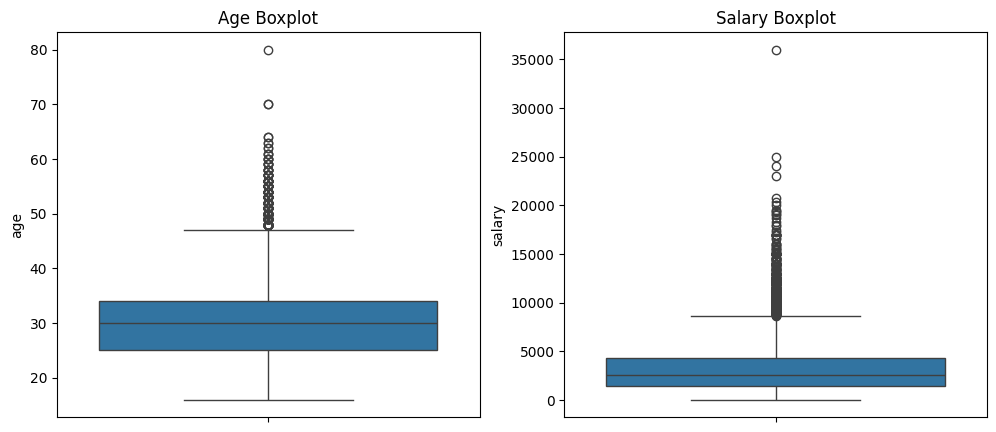

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(combined_data['age'], kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')

sns.histplot(combined_data['salary'], kde=True, ax=axes[1])
axes[1].set_title('Salary Distribution')

plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(y=combined_data['age'], ax=axes[0])
axes[0].set_title('Age Boxplot')

sns.boxplot(y=combined_data['salary'], ax=axes[1])
axes[1].set_title('Salary Boxplot')

plt.show()

In [192]:
# List of categorical columns
categorical_columns = ['projectDomain', 'currentLocation', 'mainSpecialization', 'englishProficiency',
                       'companySizeUA', 'gender', 'companyMainArea', 'experience', 'mainPosition',
                       'currentRegion', 'employmentType', 'educationLevel', 'jobTitle']

# Print value counts for each categorical feature
for col in categorical_columns:
    print(f"Value counts for {col}:")
    print(combined_data[col].value_counts())
    print("-" * 50)

Value counts for projectDomain:
projectDomain
Інша                                                                 3991
E-commerce                                                           3427
Fintech / Banking / Capital Management                               3208
Medtech / Healthcare                                                 1768
GameDev                                                              1653
                                                                     ... 
Fintech / Banking / Capital Management, Real estate, Uberfication       1
Cloud Computing, Insurance, Medtech / Healthcare                        1
Automotive, Big Data, Logistics                                         1
Miltech, Mobile, Travel                                                 1
Cloud Computing, Manufacturing, Media                                   1
Name: count, Length: 2674, dtype: int64
--------------------------------------------------
Value counts for currentLocation:
currentLocation

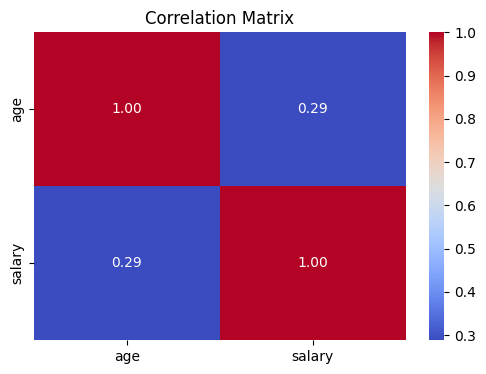

In [193]:
# Compute correlation matrix
corr_matrix = combined_data[['age', 'salary']].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

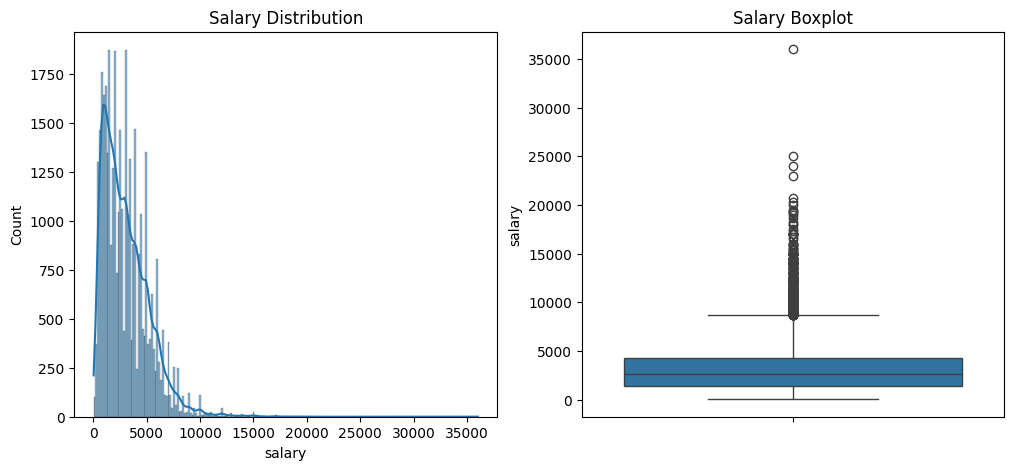

In [194]:
# Plot histogram and boxplot for salary
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(combined_data['salary'], kde=True, ax=axes[0])
axes[0].set_title('Salary Distribution')

sns.boxplot(y=combined_data['salary'], ax=axes[1])
axes[1].set_title('Salary Boxplot')

plt.show()

#Preprocessing

In [195]:
# Function for removing anomalies by salary
def remove_salary_outliers(data, salary_col, group_col):
    cleaned_data = []
    for group, subset in data.groupby(group_col):
        Q1 = subset[salary_col].quantile(0.25)
        Q3 = subset[salary_col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 0.8 * IQR
        upper_bound = Q3 + 0.8 * IQR
        cleaned_subset = subset[(subset[salary_col] >= lower_bound) & (subset[salary_col] <= upper_bound)]
        cleaned_data.append(cleaned_subset)
    return pd.concat(cleaned_data)


In [196]:
categorical_columns = ['projectDomain', 'currentLocation', 'mainSpecialization', 'englishProficiency',
                       'companySizeUA', 'gender', 'companyMainArea', 'experience', 'mainPosition',
                       'currentRegion', 'employmentType', 'educationLevel', 'jobTitle']

##projectDomain

In [197]:
combined_data['projectDomain'].nunique()

2674

In [198]:
# Replace 'Other' value in the 'projectDomain' column
combined_data['projectDomain'] = combined_data['projectDomain'].replace('Інша', 'Other')


In [199]:
domains = combined_data['projectDomain'].value_counts()
domains

,count
projectDomain,
Other,3991
E-commerce,3427
Fintech / Banking / Capital Management,3208
Medtech / Healthcare,1768
GameDev,1653
...,...
"Fintech / Banking / Capital Management, Real estate, Uberfication",1
"Cloud Computing, Insurance, Medtech / Healthcare",1
"Automotive, Big Data, Logistics",1


In [200]:
 combined_data['projectDomain'].value_counts().head(25)

,count
projectDomain,
Other,3991
E-commerce,3427
Fintech / Banking / Capital Management,3208
Medtech / Healthcare,1768
GameDev,1653
Gambling,1317
Edtech / Education,964
Telecom,678
Media,617


In [201]:
combined_data['projectDomain'].isna().sum()

25

In [202]:
combined_data = combined_data.dropna(subset=['projectDomain'])
unique_domains = combined_data['projectDomain'].unique()

In [203]:
print(combined_data.isnull().sum())

projectDomain             0
currentLocation           0
mainSpecialization    12331
englishProficiency        0
companySizeUA             0
age                       1
gender                    0
salary                   32
companyMainArea           0
experience                0
mainPosition              0
currentRegion          2699
employmentType            0
educationLevel            0
jobTitle                  0
dtype: int64


In [204]:
# groups similar project domains based on string similarity using the rapidfuzz library
import pandas as pd
from rapidfuzz import process, fuzz

# Get unique domain names
unique_domains = combined_data['projectDomain'].dropna().unique()

# Set the similarity threshold
similarity_threshold = 40

# Create a dictionary to map each domain to its group
domain_groups = {}

# Dictionary for grouping
domain_mapping = {}

# Iterate through each domain and find the most similar ones
for domain in unique_domains:
    if domain_groups:  # Ensure there is something to compare with
        match = process.extractOne(domain, domain_groups.keys(), scorer=fuzz.ratio)
    else:
        match = None  # If there are no groups yet, leave it as None

    if match is not None and match[1] >= similarity_threshold:
        domain_groups[match[0]].append(domain)
        domain_mapping[domain] = match[0]  # Assign the group
    else:
        domain_groups[domain] = [domain]
        domain_mapping[domain] = domain  # Assign as a new group independently


combined_data['projectDomain'] = combined_data['projectDomain'].map(domain_mapping)

category_counts = combined_data['projectDomain'].value_counts()


In [205]:
# create a list of categories with less than 200 values
small_categories = category_counts[category_counts < 200].index.tolist()
small_categories

['Legal, Travel', 'AR/VR']

In [206]:
# Replace these categories with "Other"
combined_data['projectDomain'] = combined_data['projectDomain'].apply(
    lambda x: 'Other' if x in small_categories else x
)

In [207]:
category_counts = combined_data['projectDomain'].value_counts()

In [208]:
category_counts

,count
projectDomain,
Fintech / Banking / Capital Management,5354
E-commerce,5194
Medtech / Healthcare,4620
Other,4164
"Big Data, Data Science, Gambling",2421
GameDev,2215
"Blockchain, Telecom",1531
"Internet of Things, Security",1418
"Geospatial, Mobile, Інша",1304


In [209]:

print(len(category_counts))

23


In [210]:
# I don't use it now, I replaced it with rapidfuzz

# threshold = 0.005 * len(combined_data)
# print(f"Поріг для об'єднання: {threshold}")

# projectDomain_counts = combined_data['projectDomain'].value_counts()

# rare_projectDomains = projectDomain_counts[projectDomain_counts < threshold].index
# print(f"Кількість рідкісних доменів: {len(rare_projectDomains)}")
# print(f"Рідкісні домени: {rare_projectDomains}")


# combined_data['projectDomain'] = combined_data['projectDomain'].apply(
#     lambda x: 'Other' if x in rare_projectDomains else x
# )

# updated_projectDomain_counts = combined_data['projectDomain'].value_counts()
# print(updated_projectDomain_counts)


# plt.figure(figsize=(10, 6))
# sns.barplot(y=updated_projectDomain_counts.index, x=updated_projectDomain_counts.values, orient='h')
# plt.title('Оновлений розподіл проектних доменів')
# plt.xlabel('Кількість')
# plt.ylabel('Проектний домен')
# plt.show()

In [211]:
# Removal of anomalies
combined_data = remove_salary_outliers(combined_data, 'salary', 'projectDomain')




In [212]:
combined_data.columns

Index(['projectDomain', 'currentLocation', 'mainSpecialization',
       'englishProficiency', 'companySizeUA', 'age', 'gender', 'salary',
       'companyMainArea', 'experience', 'mainPosition', 'currentRegion',
       'employmentType', 'educationLevel', 'jobTitle'],
      dtype='object')

##mainSpecialization

In [213]:
print(combined_data.isnull().sum())

projectDomain             0
currentLocation           0
mainSpecialization    11996
englishProficiency        0
companySizeUA             0
age                       1
gender                    0
salary                    0
companyMainArea           0
experience                0
mainPosition              0
currentRegion          2387
employmentType            0
educationLevel            0
jobTitle                  0
dtype: int64


In [214]:
unique_specializations = combined_data['mainSpecialization'].unique()

print(unique_specializations)

['Full Stack розробка' nan 'Front-end  розробка' 'Back-end  розробка'
 'Робота з даними, аналіз даних' 'DevOps' 'Mobile  розробка' 'QA' 'Інше'
 'BI-розробка' 'Front-end розробка' 'Back-end розробка' 'Mobile розробка'
 'Robotics/hardware ' 'ML' 'розробка на платформі BAF, 1C' 'embedded'
 'Automotive' 'Embedded' 'С++' 'Atlassian Administrator / JIRA Admin'
 'Firmware ' 'Embedded / Automotive' 'middleware' 'Algorithm Engineer'
 'product manager' 'Support' 'Desktop' 'Gamedev' 'ProdOps, SRE'
 'Навчання та інтеграція моделей ШІ' 'ML/DL/MLOps' 'Системний аналіз'
 'Tech/integration support' 'MLOps' 'Hardware' 'Security Specialist'
 'Integration' 'Unreal Engine' 'AI/ML research' 'Data Science' 'AI'
 'Security' 'Embedded engineer' 'SysAdmin' 'Support L1' 'network engineer'
 'sysadmin' 'я просто ВА якому прийшлось трохи розбиратись з кодом' 'PM'
 'Low-code розробка' 'Azure Cloud Engineering'
 'Розробка потрібного продукту. Часом фронт, часом бек'
 'SysOps \\ SysAdmin, розробка інтеграцій' 'AI / B

In [215]:
len(unique_specializations)

185

In [216]:
# Normalize the values ​​in the 'mainSpecialization' column
combined_data['mainSpecialization'] = combined_data['mainSpecialization'].str.strip().str.lower()

# Combining similar values
specialization_mapping = {
    'back-end розробка': 'Back-end розробка',
    'back-end  розробка': 'Back-end розробка',
    'front-end розробка': 'Front-end розробка',
    'front-end  розробка': 'Front-end розробка',
    'mobile розробка': 'Mobile розробка',
    'mobile  розробка': 'Mobile розробка',
    'embedded': 'Embedded',
    'embedded ': 'Embedded',
    'embedded  ': 'Embedded',
    'інше':'Other'
}
combined_data['mainSpecialization'] = combined_data['mainSpecialization'].replace(specialization_mapping)

combined_data['mainSpecialization'].unique()


array(['full stack розробка', nan, 'Front-end розробка',
       'Back-end розробка', 'робота з даними, аналіз даних', 'devops',
       'Mobile розробка', 'qa', 'Other', 'bi-розробка',
       'robotics/hardware', 'ml', 'розробка на платформі baf, 1c',
       'Embedded', 'automotive', 'с++',
       'atlassian administrator / jira admin', 'firmware',
       'embedded / automotive', 'middleware', 'algorithm engineer',
       'product manager', 'support', 'desktop', 'gamedev', 'prodops, sre',
       'навчання та інтеграція моделей ші', 'ml/dl/mlops',
       'системний аналіз', 'tech/integration support', 'mlops',
       'hardware', 'security specialist', 'integration', 'unreal engine',
       'ai/ml research', 'data science', 'ai', 'security',
       'embedded engineer', 'sysadmin', 'support l1', 'network engineer',
       'я просто ва якому прийшлось трохи розбиратись з кодом', 'pm',
       'low-code розробка', 'azure cloud engineering',
       'розробка потрібного продукту. часом фронт, ч

In [217]:
#get the number of values ​​for each specialization and sort in descending order
specialization_counts = combined_data['mainSpecialization'].value_counts().sort_values(ascending=False)

# Вивести результат
specialization_counts


,count
mainSpecialization,
Back-end розробка,6803
Front-end розробка,4059
full stack розробка,3530
qa,3247
Mobile розробка,1677
...,...
"product manager, який інколи по потребі пише код",1
"робота з даними, налагодження роботи системи, моніторинг та ескалація, скриптування для спрощення роботи",1
system administrator,1


In [218]:
specialization_counts.head(25)

,count
mainSpecialization,
Back-end розробка,6803
Front-end розробка,4059
full stack розробка,3530
qa,3247
Mobile розробка,1677
"робота з даними, аналіз даних",1497
devops,1105
Other,848
bi-розробка,153


In [219]:
# # Defining the top popular values ​​(for example, top 9)
# top_specializations = specialization_counts.head(8)


# # Replace all other values ​​with "other"
# combined_data['mainSpecialization'] = combined_data['mainSpecialization'].apply(
#     lambda x: x if x in top_specializations else 'Other'
# )

# # Getting updated results
# updated_specialization_counts = combined_data['mainSpecialization'].value_counts()
# print(updated_specialization_counts)

In [220]:
# updated_specialization_counts

In [221]:
specialization_mapping_to_english = {
    'Back-end розробка': 'Back-end Development',
    'Front-end розробка': 'Front-end Development',
    'full stack розробка': 'Full Stack Development',
    'qa': 'QA',
    'Mobile розробка': 'Mobile Development',
    'робота з даними, аналіз даних': 'Data Engineering & Analytics',
    'devops': 'DevOps',
    'Other': 'Other'
}

combined_data['mainSpecialization'] = combined_data['mainSpecialization'].replace(specialization_mapping_to_english)

updated_specialization_counts = combined_data['mainSpecialization'].value_counts()
print(updated_specialization_counts)

mainSpecialization
Back-end Development      6803
Front-end Development     4059
Full Stack Development    3530
QA                        3247
Mobile Development        1677
                          ... 
business analyst             1
back-end and devops          1
sysadmin \ sysops            1
підтримка                    1
написання скриптів           1
Name: count, Length: 164, dtype: int64


In [222]:
updated_specialization_counts

,count
mainSpecialization,
Back-end Development,6803
Front-end Development,4059
Full Stack Development,3530
QA,3247
Mobile Development,1677
...,...
business analyst,1
back-end and devops,1
sysadmin \ sysops,1


<ipython-input-223-fcfe038694e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=updated_specialization_counts.index, y=updated_specialization_counts.values, palette="viridis")
<ipython-input-223-fcfe038694e2>:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


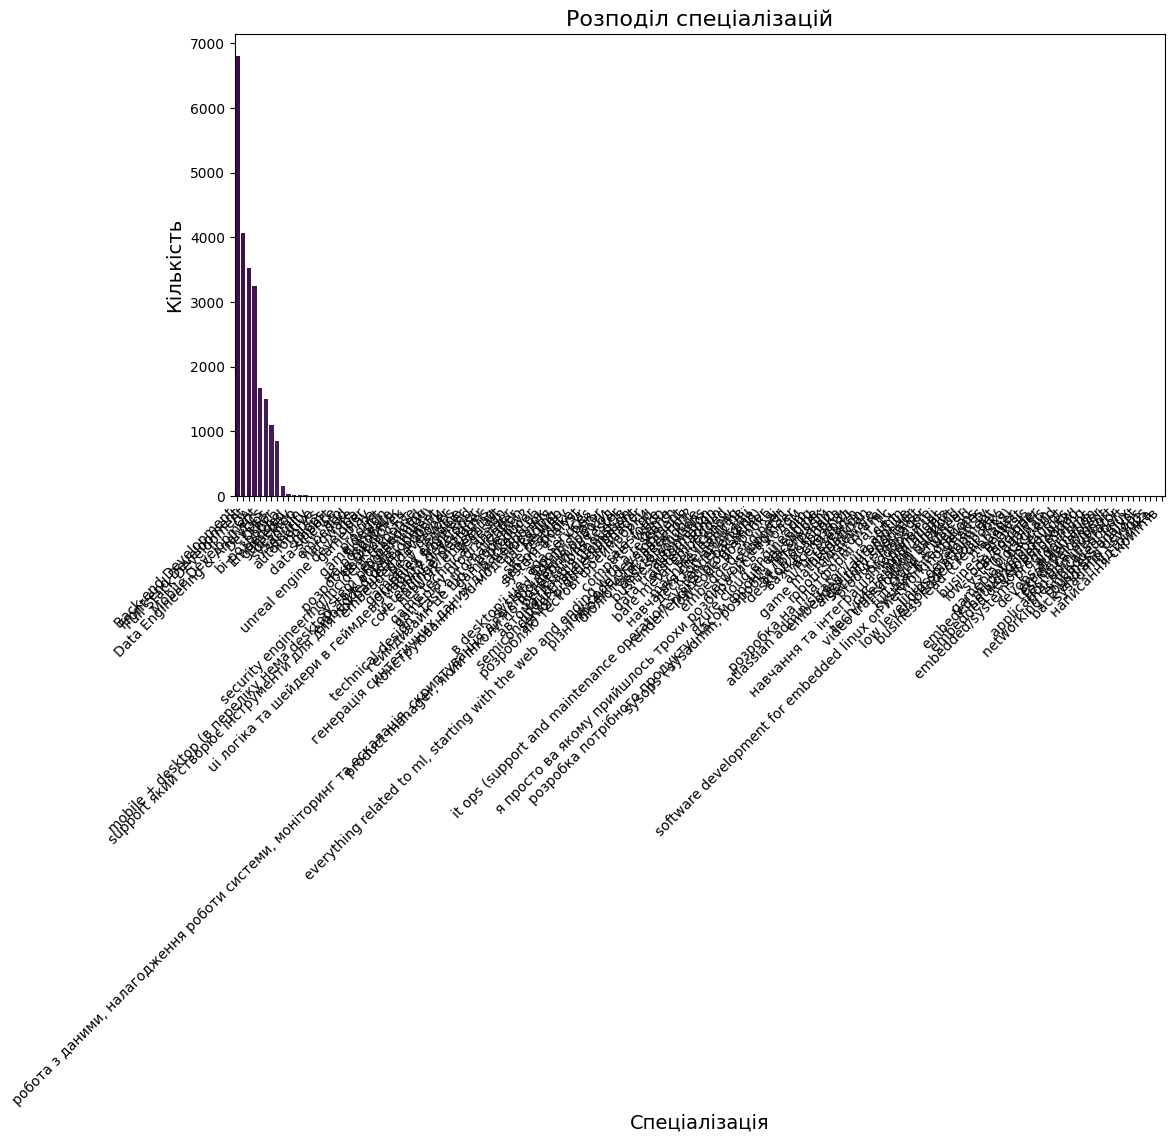

In [223]:
# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=updated_specialization_counts.index, y=updated_specialization_counts.values, palette="viridis")
plt.title('Розподіл спеціалізацій', fontsize=16)
plt.xlabel('Спеціалізація', fontsize=14)
plt.ylabel('Кількість', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [224]:
combined_data = remove_salary_outliers(combined_data, 'salary', 'mainSpecialization')

In [225]:
combined_data['mainSpecialization'].value_counts()

,count
mainSpecialization,
Back-end Development,6780
Front-end Development,3975
Full Stack Development,3500
QA,3097
Mobile Development,1656
...,...
"gameplay, back-end",1
gd,1
graphics engineer,1


##mainPosition

In [226]:
 print(combined_data['mainPosition'].value_counts())

mainPosition
Software Engineer                                                                              10719
Software Engineer / Programmer                                                                  5446
QA / AQA Engineer (Junior, Middle, Senior, Team/Tech Lead, Manager)                             2153
QA / AQA / QC Engineer (Junior, Middle, Senior, Team/Tech Lead, Manager)                         999
Data Science, Machine Learning, AI, Big Data, Data Engineer                                      788
DevOps, SRE                                                                                      626
Analyst (Business, Data, System etc)                                                             618
DevOps, SRE, Operations                                                                          342
Project/Product/Program/Delivery/Engineering Manager, Product Owner, Producer, Scrum Master      286
SysAdmin                                                                      

In [227]:
len(combined_data['mainPosition'].unique())

22

In [228]:
# groups similar project domains based on string similarity using the rapidfuzz library

from rapidfuzz import process, fuzz
import pandas as pd

unique_specializations = combined_data['mainPosition'].dropna().unique()

similarity_threshold = 65

specialization_groups = {}

for specialization in unique_specializations:
    match = process.extractOne(specialization, specialization_groups.keys(), scorer=fuzz.ratio)

    if match:
        matched_value, score, _ = match
        if score >= similarity_threshold:
            specialization_groups[matched_value].append(specialization)
        else:
            specialization_groups[specialization] = [specialization]
    else:
        specialization_groups[specialization] = [specialization]

specialization_mapping = {}
for main_category, similar_specializations in specialization_groups.items():
    for spec in similar_specializations:
        specialization_mapping[spec] = main_category

combined_data['mainPosition'] = combined_data['mainPosition'].map(specialization_mapping)

category_counts = combined_data['mainPosition'].value_counts()
print(category_counts)

mainPosition
Hardware Engineer                                                                              10746
Software Engineer / Programmer                                                                  5446
QA / AQA / QC Engineer (Junior, Middle, Senior, Team/Tech Lead, Manager)                        3152
Data Science, Machine Learning, AI, Big Data, Data Engineer                                      788
DevOps, SRE                                                                                      626
Analyst (Business, Data, System etc)                                                             618
DevOps, SRE, Operations                                                                          342
Project/Product/Program/Delivery/Engineering Manager, Product Owner, Producer, Scrum Master      286
SysAdmin                                                                                         152
Support (Customer, Technical, Community)                                      

In [229]:
# I don't use it now, I replaced it with rapidfuzz


# combined_data['mainPosition'] = combined_data['mainPosition'].str.strip().str.lower()


# position_mapping = {
#     'software engineer / programmer': 'software engineer',
#     'qa / aqa engineer (junior, middle, senior, team/tech lead, manager)': 'qa engineer',
#     'qa / aqa / qc engineer (junior, middle, senior, team/tech lead, manager)': 'qa engineer',
#     'project/product/program/delivery/engineering manager, product owner, producer, scrum master': 'project/product manager',
#     'devops, sre': 'devops',
#     'devops, sre, operations': 'devops',
#     'designer / artist (graphic, video, ux/ui)': 'designer',
#     'design and ui/ux (graphic, video, ux/ui)': 'designer',
#     'сto, director of engineering, program director, coo, ceo, (co-)founder': 'сto/director/ceo',
#     'сto, director of engineering, program director, coo, ceo, (co-)founder, head of r&d': 'сto/director/ceo',
#     'sales / business development': 'sales/business development',
#     'sales / business development / lead generation': 'sales/business development',
#     'design (game, level, narrative)': 'game design',
#     'game design (game, level, narrative)': 'game design',
#     'support (customer, technical, community)': 'support',
#     'marketing, pr, seo, copywriter': 'marketing',
#     'data science, machine learning, ai, big data, data engineer': 'data science/ai',
#     'hr/recruiter/learning and development': 'hr/recruiter',
#     'analyst (business, data, system etc)': 'analyst',
#     'technical writer': 'technical writer',
#     'html coder': 'html coder',
#     'customer success': 'customer success',
#     'finance /accounting /internal audit': 'finance/accounting',
#     'dba': 'dba',
#     'legal': 'legal',
#     'hardware engineer': 'hardware engineer',
#     'office manager': 'office manager',
#     'office manager / support': 'office manager',
#     'sound specialist / designer': 'sound specialist',
#     'localization specialist / translator': 'localization specialist',
#     'security specialist': 'security specialist',
#     'artist / animator': 'artist/animator',
#     'erp/crm': 'erp/crm',
#     'sysadmin': 'sysadmin',
#      'інше':'Other'}


# combined_data['mainPosition'] = combined_data['mainPosition'].replace(position_mapping)


In [230]:


# additional_mapping = {
#     # Technical/Content Roles
#     'technical writer': 'technical/content specialist',
#     'html coder': 'technical/content specialist',
#     'localization specialist': 'technical/content specialist',

#     # Creative Roles
#     'sound specialist': 'creative/design',
#     'artist/animator': 'creative/design',
#     'game design': 'creative/design',

#     # Infrastructure Roles
#     'dba': 'infrastructure specialist',
#     'sysadmin': 'infrastructure specialist',
#     'hardware engineer': 'infrastructure specialist',

#     # Customer Support Roles
#     'customer success': 'customer support',
#     'support': 'customer support',

#     # Administrative Roles
#     'finance/accounting': 'finance/accounting',  # Keep separate (specialized)
#     'legal': 'legal',  # Keep separate (specialized)
#     'office manager': 'administrative',  # General administrative role
# }
# combined_data['mainPosition'] = combined_data['mainPosition'].replace(additional_mapping)

In [231]:
len(combined_data['mainPosition'].unique())

19

In [232]:
 print(combined_data['mainPosition'].value_counts())

mainPosition
Hardware Engineer                                                                              10746
Software Engineer / Programmer                                                                  5446
QA / AQA / QC Engineer (Junior, Middle, Senior, Team/Tech Lead, Manager)                        3152
Data Science, Machine Learning, AI, Big Data, Data Engineer                                      788
DevOps, SRE                                                                                      626
Analyst (Business, Data, System etc)                                                             618
DevOps, SRE, Operations                                                                          342
Project/Product/Program/Delivery/Engineering Manager, Product Owner, Producer, Scrum Master      286
SysAdmin                                                                                         152
Support (Customer, Technical, Community)                                      

In [233]:

position_counts = combined_data['mainPosition'].value_counts()
insignificant_positions = position_counts[position_counts < 200].index

# Replace minor values ​​with "other"
combined_data['mainPosition'] = combined_data['mainPosition'].apply(
    lambda x: 'Other' if x in insignificant_positions else x
)


updated_position_counts = combined_data['mainPosition'].value_counts()


In [234]:
updated_position_counts

,count
mainPosition,
Hardware Engineer,10746
Software Engineer / Programmer,5446
"QA / AQA / QC Engineer (Junior, Middle, Senior, Team/Tech Lead, Manager)",3152
"Data Science, Machine Learning, AI, Big Data, Data Engineer",788
Other,694
"DevOps, SRE",626
"Analyst (Business, Data, System etc)",618
"DevOps, SRE, Operations",342
"Project/Product/Program/Delivery/Engineering Manager, Product Owner, Producer, Scrum Master",286


<ipython-input-235-c51d6ff61c29>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=updated_position_counts.index, y=updated_position_counts.values, palette="viridis")


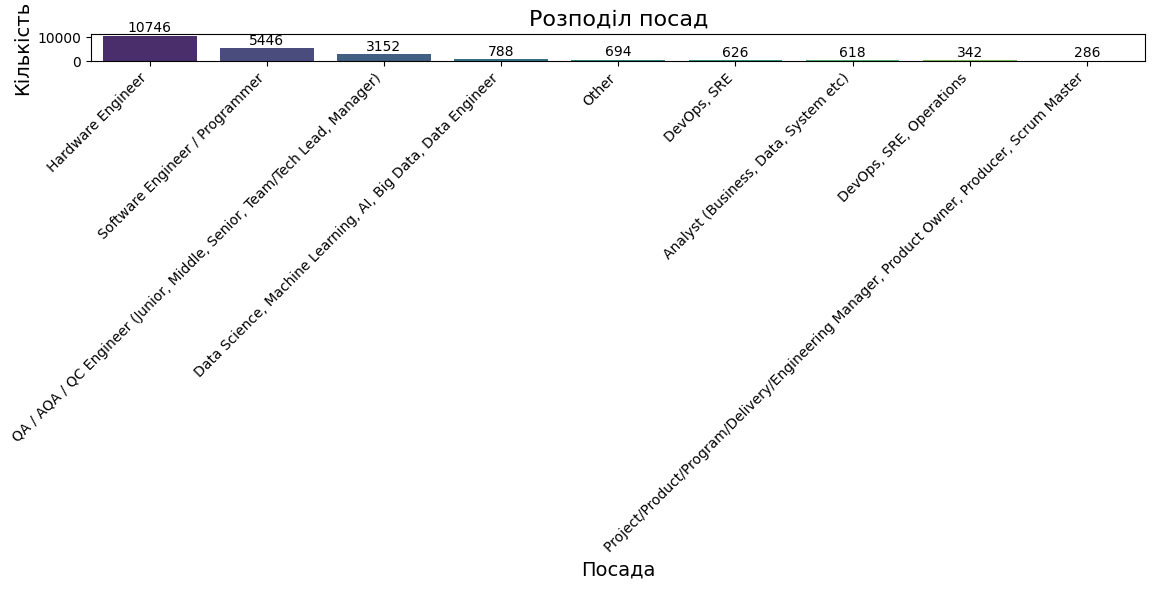

In [235]:
# Vizualization
plt.figure(figsize=(12, 6))
sns.barplot(x=updated_position_counts.index, y=updated_position_counts.values, palette="viridis")
plt.title('Розподіл посад', fontsize=16)
plt.xlabel('Посада', fontsize=14)
plt.ylabel('Кількість', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


for i, value in enumerate(updated_position_counts.values):
    plt.text(i, value + 50, str(value), ha='center', va='bottom', fontsize=10)


In [236]:
combined_data = remove_salary_outliers(combined_data, 'salary', 'mainPosition')

##englishProficiency

In [237]:
# A dictionary for combining similar categories
proficiency_mapping = {
    'Upper-Intermediate': 'Upper-Intermediate',
    '5. Upper-Intermediate': 'Upper-Intermediate',
    'Intermediate': 'Intermediate',
    '4. Intermediate': 'Intermediate',
    'Advanced': 'Advanced',
    '6. Advanced': 'Advanced',
    'Pre-Intermediate': 'Pre-Intermediate',
    '3. Pre-Intermediate': 'Pre-Intermediate',
    'Elementary': 'Elementary',
    '2. Elementary': 'Elementary',
    'Не знаю взагалі': 'No Proficiency',
    '1. Не знаю взагалі': 'No Proficiency'
}


combined_data['englishProficiency'] = combined_data['englishProficiency'].map(proficiency_mapping)


##currentLocation

In [238]:
location_mapping = {
    'За кордоном (переїхали через війну, але планую повернутися)': 'Abroad (plan to return)',
    'За кордоном, але планую повернутися': 'Abroad (plan to return)',
    'Планують повернутися': 'Abroad (plan to return)',
    'В Україні': 'In Ukraine'
}

combined_data['currentLocation'] = combined_data['currentLocation'].map(location_mapping)

##company_size

In [239]:
company_size_mapping = {
    'до 200': 'Up to 200',
    '4. до 200': 'Up to 200',
    'понад 1000': 'Over 1000',
    '6. понад 1000': 'Over 1000',
    'до 50': 'Up to 50',
    '3. до 50': 'Up to 50',
    'до 1000': 'Up to 1000',
    '5. до 1000': 'Up to 1000',
    'до 10 спеціалістів': 'Up to 10 specialists',
    '2. до 10 спеціалістів': 'Up to 10 specialists',
    'Лише я / фріланс': 'Only me / Freelance',
    '1. Лише я / фріланс': 'Only me / Freelance'
}

combined_data['companySizeUA'] = combined_data['companySizeUA'].map(company_size_mapping)

##company_main_area

In [240]:
company_main_area_mapping = {
    'Продуктова': 'Product',
    'Аутсорсингова': 'Outsourcing',
    'Сервісна (аутсорсингова)': 'Outsourcing',
    'Аутстафінгова': 'Outstaffing',
    'Стартап': 'Startup',
    'Інша': 'Other',
    'Фріланс': 'Freelance',
    'Державне підприємство / установа': 'Government Entity'
}

combined_data['companyMainArea'] = combined_data['companyMainArea'].map(company_main_area_mapping)

##region_mapping

In [241]:
region_mapping = {
    # Western Ukraine
    'Львів чи область': 'Western Ukraine',
    'Івано-Франківськ чи область': 'Western Ukraine',
    'Тернопіль чи область': 'Western Ukraine',
    'Ужгород чи Закарпатська область': 'Western Ukraine',
    'Чернівці чи область': 'Western Ukraine',
    'Рівне чи область': 'Western Ukraine',
    'Луцьк чи Волинська область': 'Western Ukraine',

    # Central Ukraine
    'Київ чи область': 'Central Ukraine',
    'Вінниця чи область': 'Central Ukraine',
    'Черкаси чи область': 'Central Ukraine',
    'Полтава чи область': 'Central Ukraine',
    'Хмельницький чи область': 'Central Ukraine',
    'Житомир чи область': 'Central Ukraine',
    'Кропивницький чи область': 'Central Ukraine',

    # Eastern Ukraine
    'Харків чи область': 'Eastern Ukraine',
    'Дніпро чи область': 'Eastern Ukraine',
    'Запоріжжя чи область': 'Eastern Ukraine',
    'Суми чи область': 'Eastern Ukraine',
    'Чернігів чи область': 'Eastern Ukraine',

    # Southern Ukraine
    'Одеса чи область': 'Southern Ukraine',
    'Миколаїв чи область': 'Southern Ukraine',
    'Херсон чи область': 'Southern Ukraine',

    # Other
    'Інше': 'Other',
    'Донецька чи Луганська область': 'Other',
    'Не в Україні': 'Other',
}



# region_mapping = {
#     'Київ чи область': 'Kyiv or region',
#     'Львів чи область': 'Lviv or region',
#     'Дніпро чи область': 'Dnipro or region',
#     'Одеса чи область': 'Odesa or region',
#     'Харків чи область': 'Kharkiv or region',
#     'Івано-Франківськ чи область': 'Ivano-Frankivsk or region',
#     'Вінниця чи область': 'Vinnytsia or region',
#     'Черкаси чи область': 'Cherkasy or region',
#     'Полтава чи область': 'Poltava or region',
#     'Хмельницький чи область': 'Khmelnytskyi or region',
#     'Тернопіль чи область': 'Ternopil or region',
#     'Ужгород чи Закарпатська область': 'Uzhhorod or Zakarpattia region',
#     'Чернівці чи область': 'Chernivtsi or region',
#     'Рівне чи область': 'Rivne or region',
#     'Житомир чи область': 'Zhytomyr or region',
#     'Луцьк чи Волинська область': 'Lutsk or Volyn region',
#     'Кропивницький чи область': 'Kropyvnytskyi or region',
#     'Суми чи область': 'Sumy or region',
#     'Запоріжжя чи область': 'Zaporizhzhia or region',
#     'Чернігів чи область': 'Chernihiv or region',
#     'Миколаїв чи область': 'Mykolaiv or region',
#     'Інше': 'Other',
#     'Донецька чи Луганська область': 'Donetsk or Luhansk region',
#     'Херсон чи область': 'Kherson or region',
#     'Не в Україні': 'Not in Ukraine'
# }

combined_data['currentRegion'] = combined_data['currentRegion'].map(region_mapping)

##gender

In [242]:
gender_mapping = {
    'Чоловік': 'Male',
    'Жінка': 'Female'
}

combined_data['gender'] = combined_data['gender'].map(gender_mapping)

##employmentType

In [243]:
employment_type_mapping = {
    'Працюю full-time в ІТ-компанії чи ІТ-відділі': 'Full-time IT employee',
    'Втратив(-ла) роботу в ІТ і шукаю нову': 'Unemployed (looking for IT job)',
    'Працюю part-time в ІТ-компанії чи ІТ-відділі': 'Part-time IT employee',
    'Я фрилансер(-ка) в ІТ': 'Freelancer in IT',
    'Зараз на повністю оплачуваному бенчі в ІТ-компанії': 'On bench (paid/unpaid)',
    'Зараз в неоплачуваній відпустці / бенчі в ІТ-компанії': 'On bench (paid/unpaid)',
    'Зараз на частково оплачуваному бенчі в ІТ-компанії': 'On bench (paid/unpaid)',
    'Тимчасово не працюю і не шукаю роботу (sabbatical, декрет, волонтерство etc)': 'Not working (temporary)',
    'Працював(-ла) в IT, нині на військовій службі': 'Military service (ex-IT)'
}

combined_data['employmentType'] = combined_data['employmentType'].map(employment_type_mapping)

##educationLevel

In [244]:
education_level_mapping = {
    'Вища (бакалавр, спеціаліст, магістр) - одна або декілька': 'Higher Education (Bachelor, Specialist, Master)',
    '5. Вища (бакалавр, спеціаліст, магістр) - одна або декілька': 'Higher Education (Bachelor, Specialist, Master)',
    'Незакінчена вища': 'Incomplete Higher Education',
    '4. Незакінчена вища': 'Incomplete Higher Education',
    'Ще студент вишу': 'Current University Student',
    '3. Ще студент вишу': 'Current University Student',
    'Середня спеціальна': 'Secondary Specialized Education',
    '2. Середня спеціальна': 'Secondary Specialized Education',
    'Середня': 'Secondary Education',
    '1. Середня': 'Secondary Education',
    'Науковий ступінь (кандидат / доктор наук, PhD)': 'PhD or Doctorate',
    '6. Науковий ступінь (кандидат / доктор наук, PhD)': 'PhD or Doctorate'
}

combined_data['educationLevel'] = combined_data['educationLevel'].map(education_level_mapping)

In [245]:
combined_data = remove_salary_outliers(combined_data, 'salary', 'educationLevel')

print(combined_data['salary'].describe())

count    22097.000000
mean      2929.772346
std       1595.859407
min         50.000000
25%       1500.000000
50%       2900.000000
75%       4200.000000
max       6300.000000
Name: salary, dtype: float64


##jobTitle

In [246]:
print(combined_data['jobTitle'].value_counts())

jobTitle
Middle            8545
Senior            6502
Junior            3894
Team Lead         1371
Tech Lead          786
Немає тайтлу       399
Intern/Trainee     220
Architect          142
Manager            127
Head               111
Name: count, dtype: int64


In [247]:
job_title_mapping = {
    "Junior": "Junior",
    "Intern/Trainee": "Junior",
    "Middle": "Middle",
    "Senior": "Senior",
    "Tech Lead": "Senior",
    "Architect": "Senior",
    "Team Lead": "Lead/Manager",
    "Manager": "Lead/Manager",
    "Head": "Lead/Manager",
    "Немає тайтлу": "No Title"
}

combined_data['jobTitle'] = combined_data['jobTitle'].map(job_title_mapping)

In [248]:
print(combined_data['jobTitle'].value_counts())

jobTitle
Middle          8545
Senior          7430
Junior          4114
Lead/Manager    1609
No Title         399
Name: count, dtype: int64


In [249]:
combined_data = remove_salary_outliers(combined_data, 'salary', 'jobTitle')

print(combined_data['salary'].describe())

count    20754.000000
mean      2928.475205
std       1584.074012
min        100.000000
25%       1500.000000
50%       2937.500000
75%       4100.000000
max       6300.000000
Name: salary, dtype: float64


In [250]:
print(combined_data['projectDomain'].value_counts())
print("___________________________________________________________")


print(combined_data['mainSpecialization'].value_counts())
print("___________________________________________________________")


print(combined_data['mainPosition'].value_counts())
print("___________________________________________________________")



print(combined_data['currentLocation'].value_counts())
print("___________________________________________________________")


print(combined_data['englishProficiency'].value_counts())
print("___________________________________________________________")


print(combined_data['companySizeUA'].value_counts())
print("___________________________________________________________")


print(combined_data['gender'].value_counts())
print("___________________________________________________________")


print(combined_data['companyMainArea'].value_counts())
print("___________________________________________________________")

print(combined_data['currentRegion'].value_counts())
print("___________________________________________________________")

print(combined_data['mainPosition'].value_counts())
print("___________________________________________________________")

print(combined_data['employmentType'].value_counts())
print("___________________________________________________________")

print(combined_data['educationLevel'].value_counts())
print("___________________________________________________________")


print(combined_data['jobTitle'].value_counts())
print("___________________________________________________________")

projectDomain
E-commerce                                                       3213
Fintech / Banking / Capital Management                           2983
Medtech / Healthcare                                             2618
Other                                                            2079
Big Data, Data Science, Gambling                                 1290
Blockchain, Telecom                                               877
Internet of Things, Security                                      794
GameDev                                                           705
Geospatial, Mobile, Інша                                          659
Retail                                                            594
Automotive                                                        555
Manufacturing                                                     540
E-commerce, Legal, Public services / Government                   535
Logistics                                                         534
Insura

##Experience

In [251]:
print(combined_data['experience'].describe())
print(combined_data['experience'].value_counts())

count    20754.000000
mean         4.720006
std          3.498869
min          0.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         15.000000
Name: experience, dtype: float64
experience
3     3155
2     2918
5     2389
4     2356
1     2115
6     1688
7     1273
0     1122
8      910
10     772
15     629
9      500
12     337
11     309
13     177
14     104
Name: count, dtype: int64


In [252]:
combined_data['experience'] = pd.cut(
    combined_data['experience'],
    bins=[0, 3, 6, 9, 12, 15],
    labels=['0-3', '4-6', '7-9', '10-12', '13-15'],
    include_lowest=True
)
print(combined_data['experience'].value_counts())


experience
0-3      9310
4-6      6433
7-9      2683
10-12    1418
13-15     910
Name: count, dtype: int64


In [253]:
combined_data = remove_salary_outliers(combined_data, 'salary', 'experience')

<ipython-input-195-8f896d0b673f>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for group, subset in data.groupby(group_col):


In [254]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19266 entries, 4180 to 2016
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   projectDomain       19266 non-null  object  
 1   currentLocation     19266 non-null  object  
 2   mainSpecialization  19266 non-null  object  
 3   englishProficiency  19266 non-null  object  
 4   companySizeUA       19266 non-null  object  
 5   age                 19265 non-null  float64 
 6   gender              19266 non-null  object  
 7   salary              19266 non-null  float64 
 8   companyMainArea     19266 non-null  object  
 9   experience          19266 non-null  category
 10  mainPosition        19266 non-null  object  
 11  currentRegion       18098 non-null  object  
 12  employmentType      19266 non-null  object  
 13  educationLevel      19266 non-null  object  
 14  jobTitle            19266 non-null  object  
dtypes: category(1), float64(2), object(12)


##age

In [255]:
print(combined_data['age'].value_counts())

age
25.0    1136
27.0    1133
28.0    1107
26.0    1098
23.0    1082
29.0    1067
30.0    1045
24.0     987
33.0     963
32.0     938
22.0     934
31.0     901
34.0     838
35.0     821
21.0     753
36.0     686
37.0     575
20.0     523
38.0     497
39.0     363
40.0     354
19.0     234
41.0     227
42.0     223
43.0     168
44.0     118
45.0     108
18.0      69
46.0      60
47.0      54
48.0      47
49.0      34
50.0      31
53.0      15
52.0      14
17.0      12
54.0      11
51.0      10
56.0       6
55.0       5
16.0       4
61.0       2
59.0       2
60.0       2
57.0       2
62.0       2
58.0       2
64.0       1
63.0       1
Name: count, dtype: int64


In [256]:
bins = [16, 24, 34, 44, 80]
labels = ['16-24', '25-34', '35-44', '45+']
combined_data['age'] = pd.cut(combined_data['age'], bins=bins, labels=labels, right=True)


In [257]:
combined_data = remove_salary_outliers(combined_data, 'salary', 'age')

<ipython-input-195-8f896d0b673f>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for group, subset in data.groupby(group_col):


## mainSpecialization other

In [258]:
combined_data_copy = combined_data.copy()

In [259]:
print(combined_data_copy['mainSpecialization'].value_counts())

mainSpecialization
Back-end Development                                                                                        5377
Front-end Development                                                                                       3450
Full Stack Development                                                                                      2863
QA                                                                                                          2775
Mobile Development                                                                                          1417
                                                                                                            ... 
робота з даними, налагодження роботи системи, моніторинг та ескалація, скриптування для спрощення роботи       1
support l1                                                                                                     1
atlassian administrator / jira admin                                         

In [260]:
print(combined_data.isnull().sum())

projectDomain            0
currentLocation          0
mainSpecialization       0
englishProficiency       0
companySizeUA            0
age                      0
gender                   0
salary                   0
companyMainArea          0
experience               0
mainPosition             0
currentRegion         1135
employmentType           0
educationLevel           0
jobTitle                 0
dtype: int64


In [261]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a copy of the original dataset
combined_data_copy = combined_data.copy()

# Convert categorical features to numerical
label_encoder_position = LabelEncoder()

# Need to convert text values to numerical for "mainPosition"
combined_data_copy['mainPosition2'] = label_encoder_position.fit_transform(combined_data_copy['mainPosition'].fillna('Unknown'))

# Replace "Other" with NaN
combined_data_copy['mainSpecialization'] = combined_data_copy['mainSpecialization'].replace('Other', pd.NA)

# Select rows where mainSpecialization is missing (NaN)
missing_specializations = combined_data_copy[combined_data_copy['mainSpecialization'].isna()]

# Select features for modeling (mainPosition)
features = ['mainPosition2']  # Можна додати більше ознак, якщо є

# 2. Prepare training data
train_data = combined_data_copy.dropna(subset=['mainSpecialization'])

# X — features, y — target variable (mainSpecialization)
X_train = train_data[features]
y_train = train_data['mainSpecialization']

# 3. Split into training and testing sets for model evaluation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 4. Modeling: Use RandomForestClassifier for prediction
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Model evaluation
y_pred = model.predict(X_val)
print(f'Accuracy: {accuracy_score(y_val, y_pred)}')

# 6. Predict specializations for missing values
X_missing = missing_specializations[features]
predicted_specializations = model.predict(X_missing)

# 7. Fill missing values in mainSpecialization
combined_data_copy.loc[combined_data_copy['mainSpecialization'].isna(), 'mainSpecialization'] = predicted_specializations

# 8. Check results
print(combined_data_copy['mainSpecialization'].value_counts())


Accuracy: 0.536766730928119
mainSpecialization
Back-end Development                                                                                        5768
Front-end Development                                                                                       3450
Full Stack Development                                                                                      2863
QA                                                                                                          2784
Mobile Development                                                                                          1417
                                                                                                            ... 
робота з даними, налагодження роботи системи, моніторинг та ескалація, скриптування для спрощення роботи       1
support l1                                                                                                     1
atlassian administrator / jira admin             

In [262]:
print(combined_data_copy['mainSpecialization'].value_counts())

mainSpecialization
Back-end Development                                                                                        5768
Front-end Development                                                                                       3450
Full Stack Development                                                                                      2863
QA                                                                                                          2784
Mobile Development                                                                                          1417
                                                                                                            ... 
робота з даними, налагодження роботи системи, моніторинг та ескалація, скриптування для спрощення роботи       1
support l1                                                                                                     1
atlassian administrator / jira admin                                         

In [263]:
print(combined_data['mainSpecialization'].value_counts())

mainSpecialization
Back-end Development                                                                                        5377
Front-end Development                                                                                       3450
Full Stack Development                                                                                      2863
QA                                                                                                          2775
Mobile Development                                                                                          1417
                                                                                                            ... 
робота з даними, налагодження роботи системи, моніторинг та ескалація, скриптування для спрощення роботи       1
support l1                                                                                                     1
atlassian administrator / jira admin                                         

In [264]:
combined_data_copy.head(10)

,projectDomain,currentLocation,mainSpecialization,englishProficiency,companySizeUA,age,gender,salary,companyMainArea,experience,mainPosition,currentRegion,employmentType,educationLevel,jobTitle,mainPosition2
4180,Agriculture,In Ukraine,Data Engineering & Analytics,Upper-Intermediate,Up to 50,16-24,Male,550.0,Product,0-3,"Analyst (Business, Data, System etc)",Central Ukraine,Full-time IT employee,Current University Student,Junior,0
29981,Automotive,In Ukraine,Data Engineering & Analytics,Elementary,Up to 50,16-24,Male,650.0,Outsourcing,0-3,"Analyst (Business, Data, System etc)",Central Ukraine,Full-time IT employee,Current University Student,Junior,0
60,"Big Data, Data Science, Gambling",In Ukraine,Data Engineering & Analytics,Upper-Intermediate,Up to 200,16-24,Female,500.0,Other,0-3,"Analyst (Business, Data, System etc)",Central Ukraine,Full-time IT employee,Current University Student,Junior,0
11593,"Big Data, Data Science, Gambling",In Ukraine,Data Engineering & Analytics,Upper-Intermediate,Up to 1000,16-24,Male,500.0,Outsourcing,0-3,"Analyst (Business, Data, System etc)",Eastern Ukraine,Full-time IT employee,Current University Student,Junior,0
13283,"Big Data, Data Science, Gambling",In Ukraine,Data Engineering & Analytics,Upper-Intermediate,Up to 1000,16-24,Male,600.0,Product,0-3,"Analyst (Business, Data, System etc)",Central Ukraine,Full-time IT employee,Current University Student,Junior,0
25057,"Big Data, Data Science, Gambling",In Ukraine,Data Engineering & Analytics,Intermediate,Up to 1000,16-24,Male,454.0,Product,0-3,"Analyst (Business, Data, System etc)",Central Ukraine,Full-time IT employee,Current University Student,Junior,0
30433,"Big Data, Data Science, Gambling",Abroad (plan to return),Data Engineering & Analytics,Intermediate,Only me / Freelance,16-24,Male,690.0,Product,0-3,"Analyst (Business, Data, System etc)",NaN,Full-time IT employee,Current University Student,Junior,0
24785,"Blockchain, Telecom",In Ukraine,Data Engineering & Analytics,Upper-Intermediate,Up to 200,16-24,Male,1100.0,Product,0-3,"Analyst (Business, Data, System etc)",Central Ukraine,Full-time IT employee,Current University Student,Junior,0
34060,"Blockchain, Telecom",In Ukraine,Data Engineering & Analytics,Upper-Intermediate,Up to 1000,16-24,Female,1150.0,Product,0-3,"Analyst (Business, Data, System etc)",Central Ukraine,Full-time IT employee,Current University Student,Junior,0
16344,"Business Intelligence / Data Warehouse, E-comm...",In Ukraine,Data Engineering & Analytics,Pre-Intermediate,Up to 200,16-24,Male,617.0,Outsourcing,0-3,"Analyst (Business, Data, System etc)",Central Ukraine,Full-time IT employee,Current University Student,Junior,0


In [265]:
# combined_data=combined_data_copy

In [266]:
# combined_data=combined_data_copy.dropna(columns=['mainPosition2'])

In [267]:
combined_data = remove_salary_outliers(combined_data, 'salary', 'mainSpecialization')

print(combined_data['salary'].describe())

count    18609.000000
mean      2815.991055
std       1502.030269
min        100.000000
25%       1500.000000
50%       2800.000000
75%       4000.000000
max       6200.000000
Name: salary, dtype: float64


In [268]:
print(combined_data['mainSpecialization'].value_counts())

mainSpecialization
Back-end Development                                                          5377
Front-end Development                                                         3385
Full Stack Development                                                        2859
QA                                                                            2773
Mobile Development                                                            1417
                                                                              ... 
game mathematician                                                               1
game                                                                             1
everything related to ml, starting with the web and ending with a research       1
erp                                                                              1
я просто ва якому прийшлось трохи розбиратись з кодом                            1
Name: count, Length: 132, dtype: int64


#EDA

In [269]:
dou=combined_data.copy()

In [270]:
dou['mainPosition'].value_counts()

,count
mainPosition,
Hardware Engineer,8827
Software Engineer / Programmer,4534
"QA / AQA / QC Engineer (Junior, Middle, Senior, Team/Tech Lead, Manager)",2820
"Data Science, Machine Learning, AI, Big Data, Data Engineer",612
"Analyst (Business, Data, System etc)",510
"DevOps, SRE",456
Other,393
"DevOps, SRE, Operations",270
"Project/Product/Program/Delivery/Engineering Manager, Product Owner, Producer, Scrum Master",187


In [271]:
dou['mainPosition'].nunique()

9

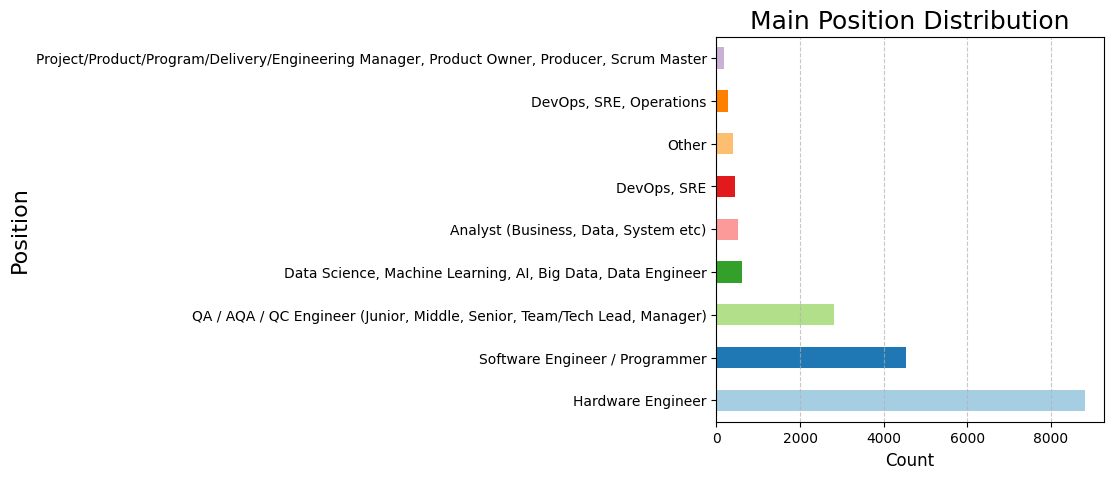

In [272]:
main_position_distribution = dou['mainPosition'].value_counts()[:25]

colors = plt.cm.Paired(range(len(main_position_distribution)))

plt.figure(figsize=(5, 5))
main_position_distribution.plot(kind='barh', color=colors)
plt.title('Main Position Distribution', fontsize=18)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Position', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

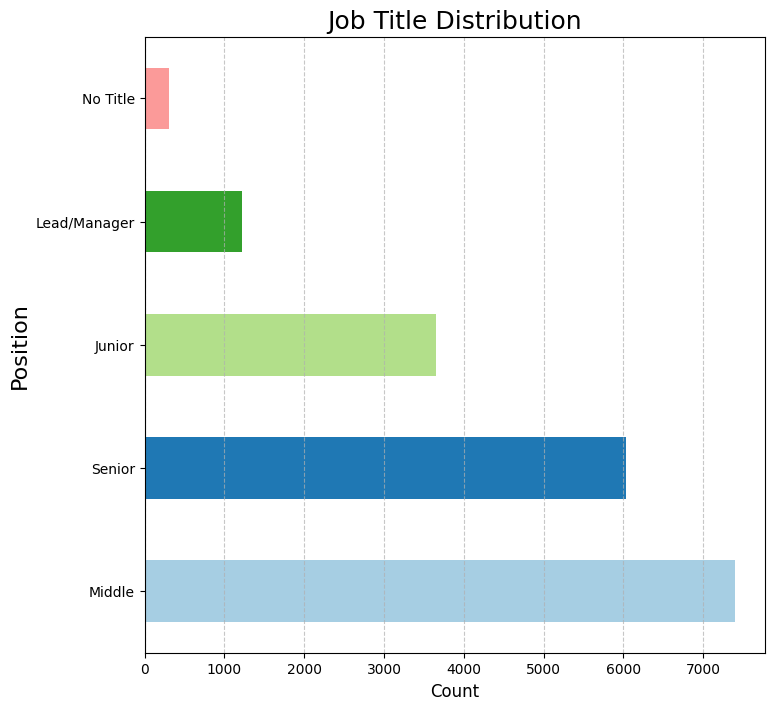

In [273]:
jobTitle_distribution = dou['jobTitle'].value_counts()

colors = plt.cm.Paired(range(len(jobTitle_distribution)))

plt.figure(figsize=(8, 8))
jobTitle_distribution.plot(kind='barh', color=colors)
plt.title('Job Title Distribution', fontsize=18)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Position', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

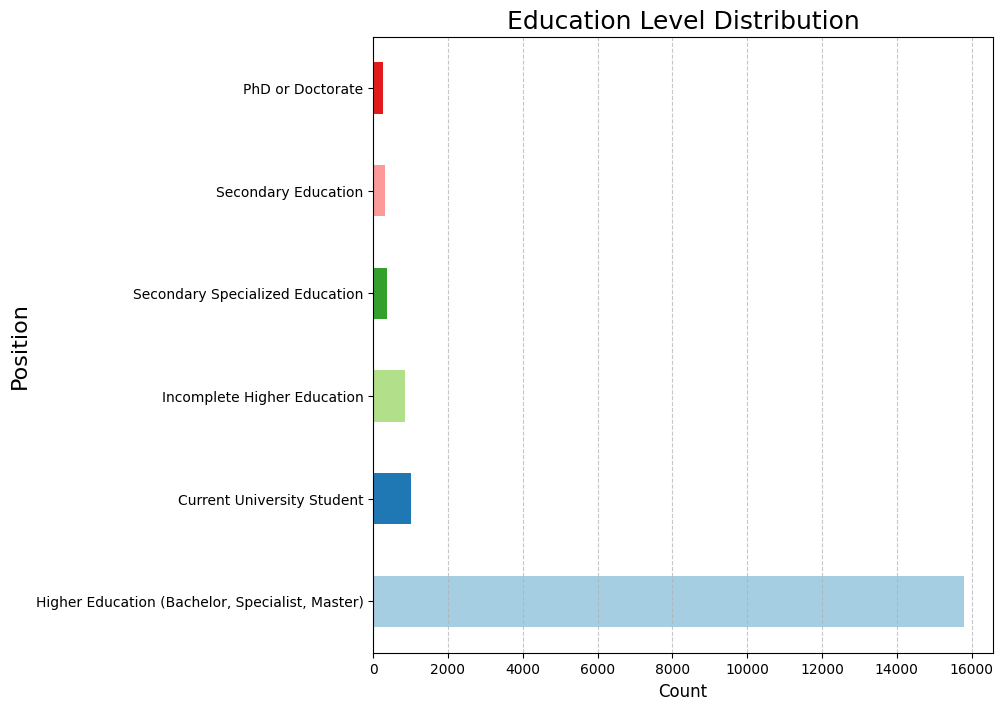

In [274]:
educationLevel_distribution = dou['educationLevel'].value_counts()

colors = plt.cm.Paired(range(len(educationLevel_distribution)))

plt.figure(figsize=(8, 8))
educationLevel_distribution.plot(kind='barh', color=colors)
plt.title('Education Level Distribution', fontsize=18)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Position', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Додаємо сітку для зручності
plt.show()


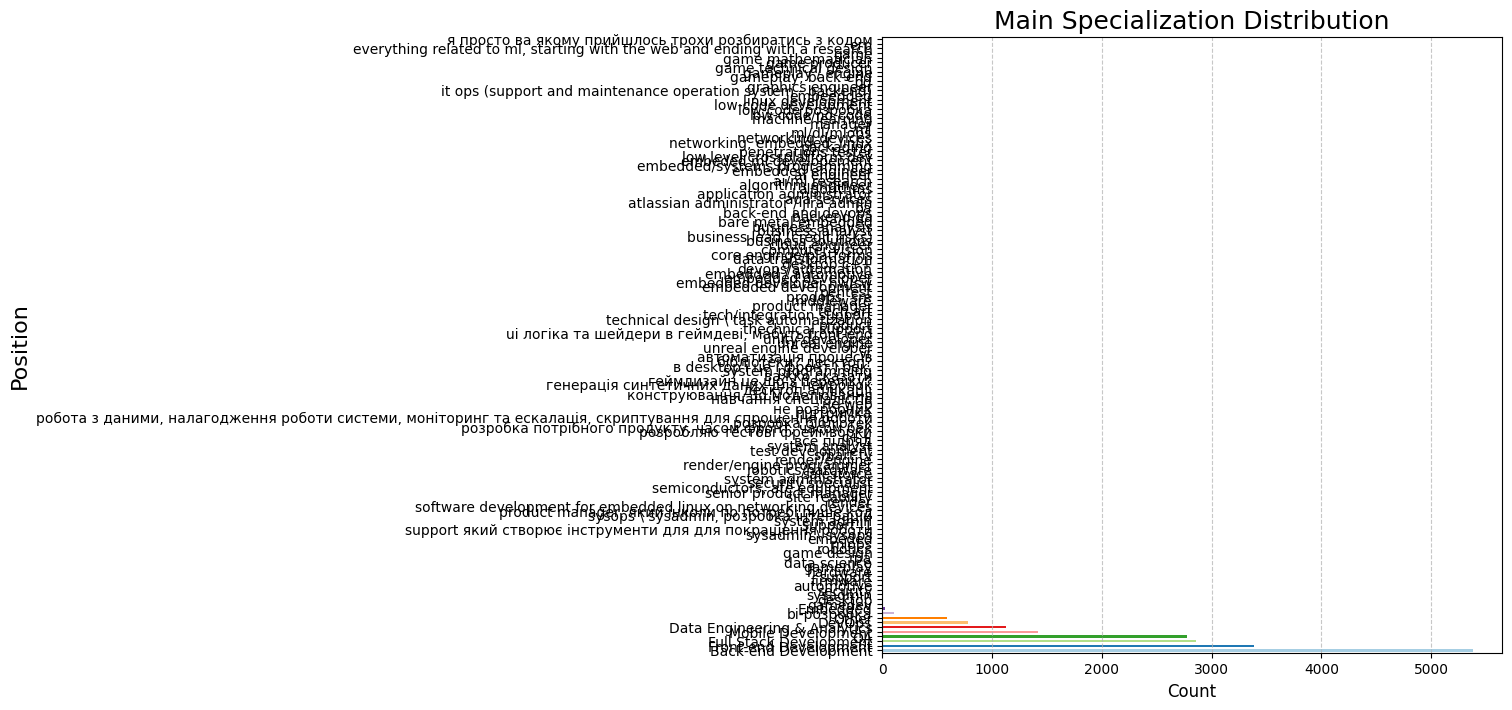

In [275]:
mainSpecialization_distribution = dou['mainSpecialization'].value_counts()

colors = plt.cm.Paired(range(len(mainSpecialization_distribution)))

plt.figure(figsize=(8, 8))
mainSpecialization_distribution.plot(kind='barh', color=colors)
plt.title('Main Specialization Distribution', fontsize=18)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Position', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()




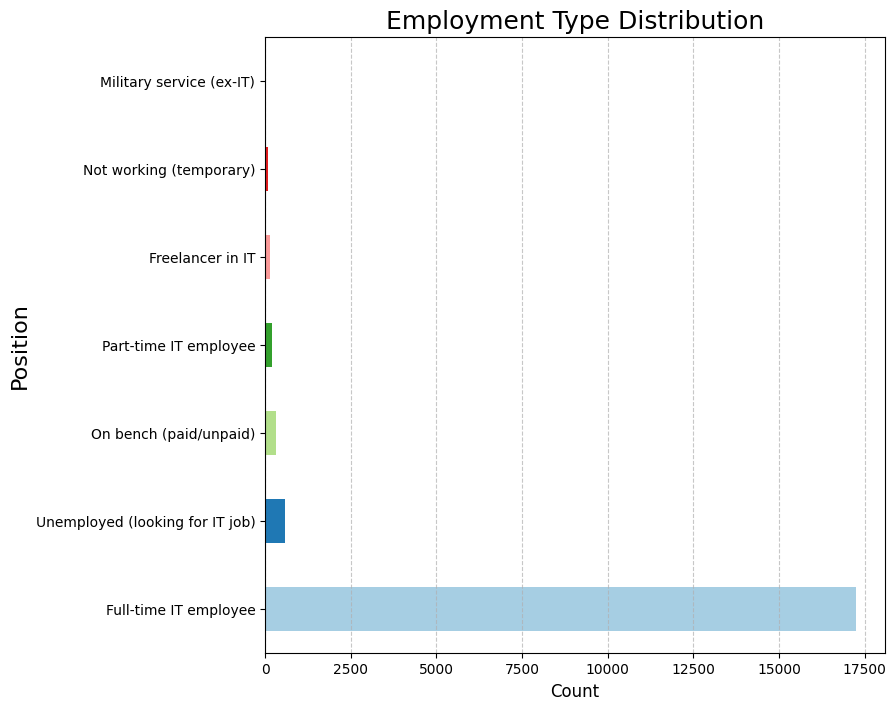

In [276]:
employmentType_distribution = dou['employmentType'].value_counts()

colors = plt.cm.Paired(range(len(employmentType_distribution)))

plt.figure(figsize=(8, 8))
employmentType_distribution.plot(kind='barh', color=colors)
plt.title('Employment Type Distribution', fontsize=18)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Position', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

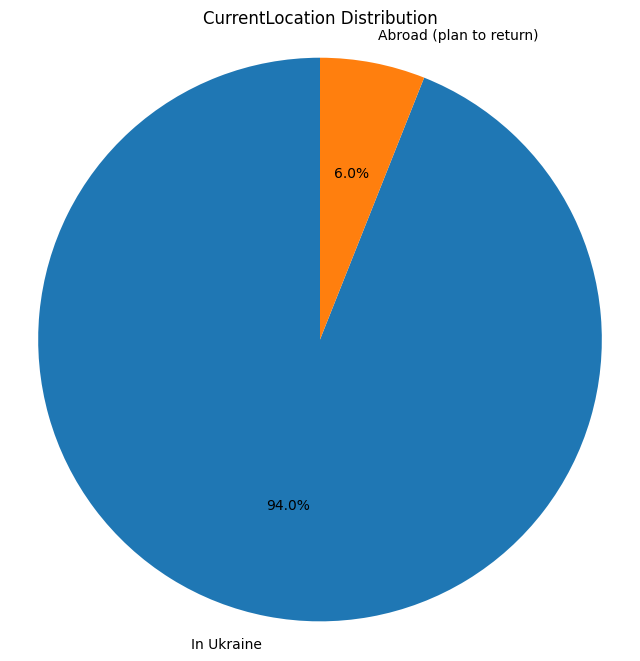

In [277]:
import pandas as pd
import matplotlib.pyplot as plt


employment_type_distribution = dou['currentLocation'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(employment_type_distribution, labels=employment_type_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('СurrentLocation Distribution')
plt.axis('equal')
plt.show()


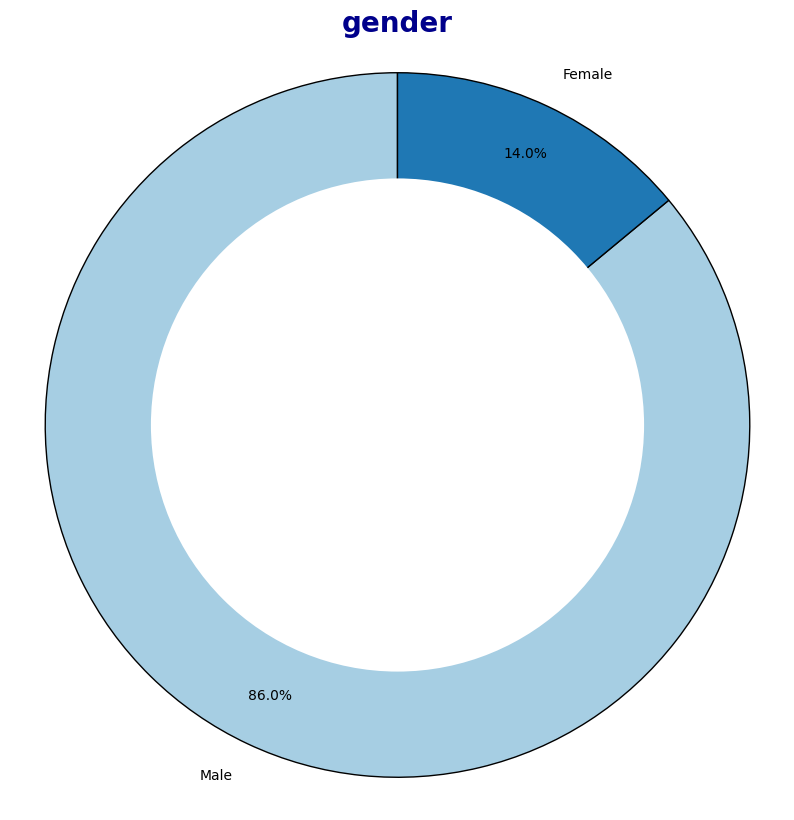

In [278]:
gender_distribution = dou['gender'].value_counts()


colors = plt.cm.Paired(range(len(gender_distribution)))


plt.figure(figsize=(10, 10))
plt.pie(
    gender_distribution,
    labels=gender_distribution.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'black'},
    pctdistance=0.85
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.title('gender', fontsize=20, fontweight='bold', color='darkblue')
plt.show()

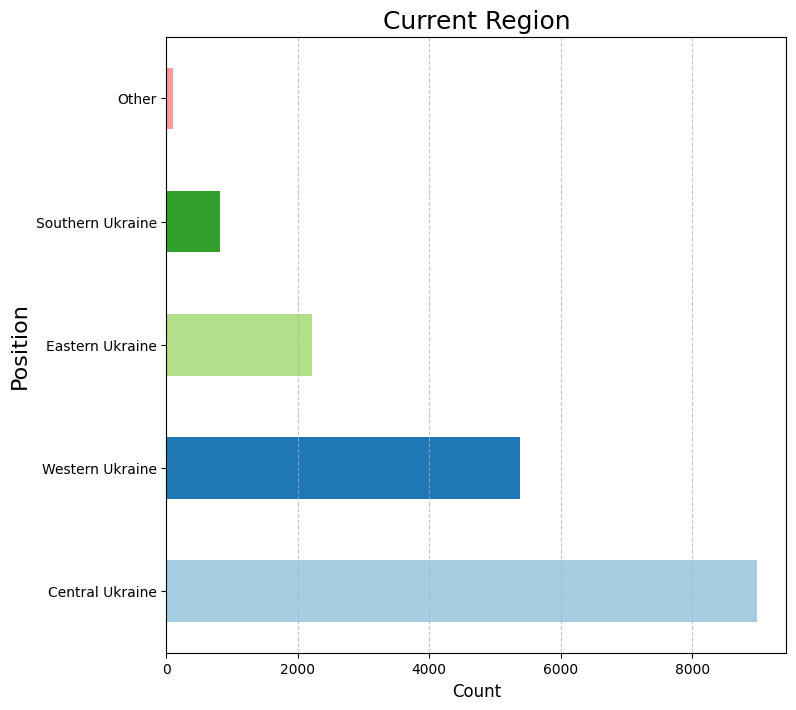

In [279]:
companyMainArea_distribution = dou['currentRegion'].value_counts()

colors = plt.cm.Paired(range(len(companyMainArea_distribution)))

plt.figure(figsize=(8, 8))
companyMainArea_distribution.plot(kind='barh', color=colors)
plt.title('Сurrent Region', fontsize=18)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Position', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()




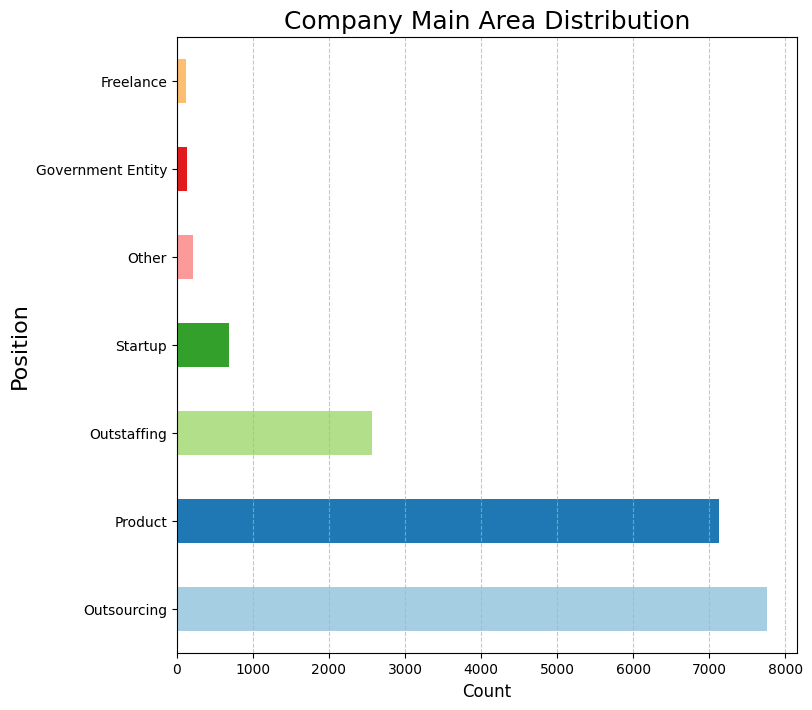

In [280]:
companyMainArea_distribution = dou['companyMainArea'].value_counts()

colors = plt.cm.Paired(range(len(companyMainArea_distribution)))

plt.figure(figsize=(8, 8))
companyMainArea_distribution.plot(kind='barh', color=colors)
plt.title('Company Main Area Distribution', fontsize=18)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Position', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()




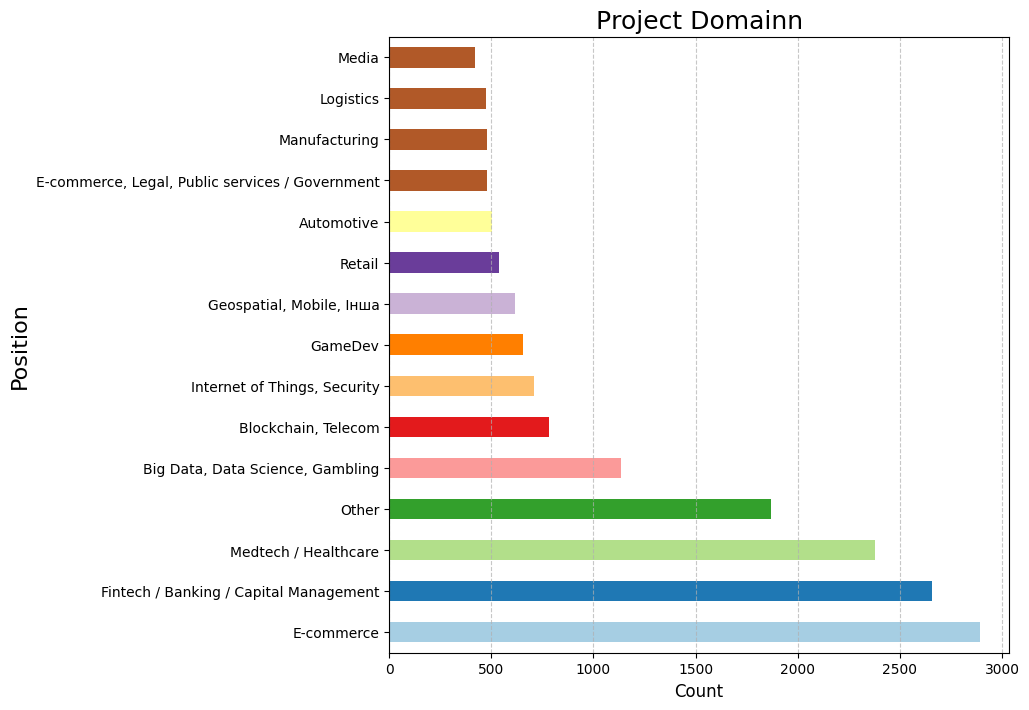

In [281]:
companyMainArea_distribution = dou['projectDomain'].value_counts().head(15)

colors = plt.cm.Paired(range(len(companyMainArea_distribution)))

plt.figure(figsize=(8, 8))
companyMainArea_distribution.plot(kind='barh', color=colors)
plt.title('Рroject Domainn', fontsize=18)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Position', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


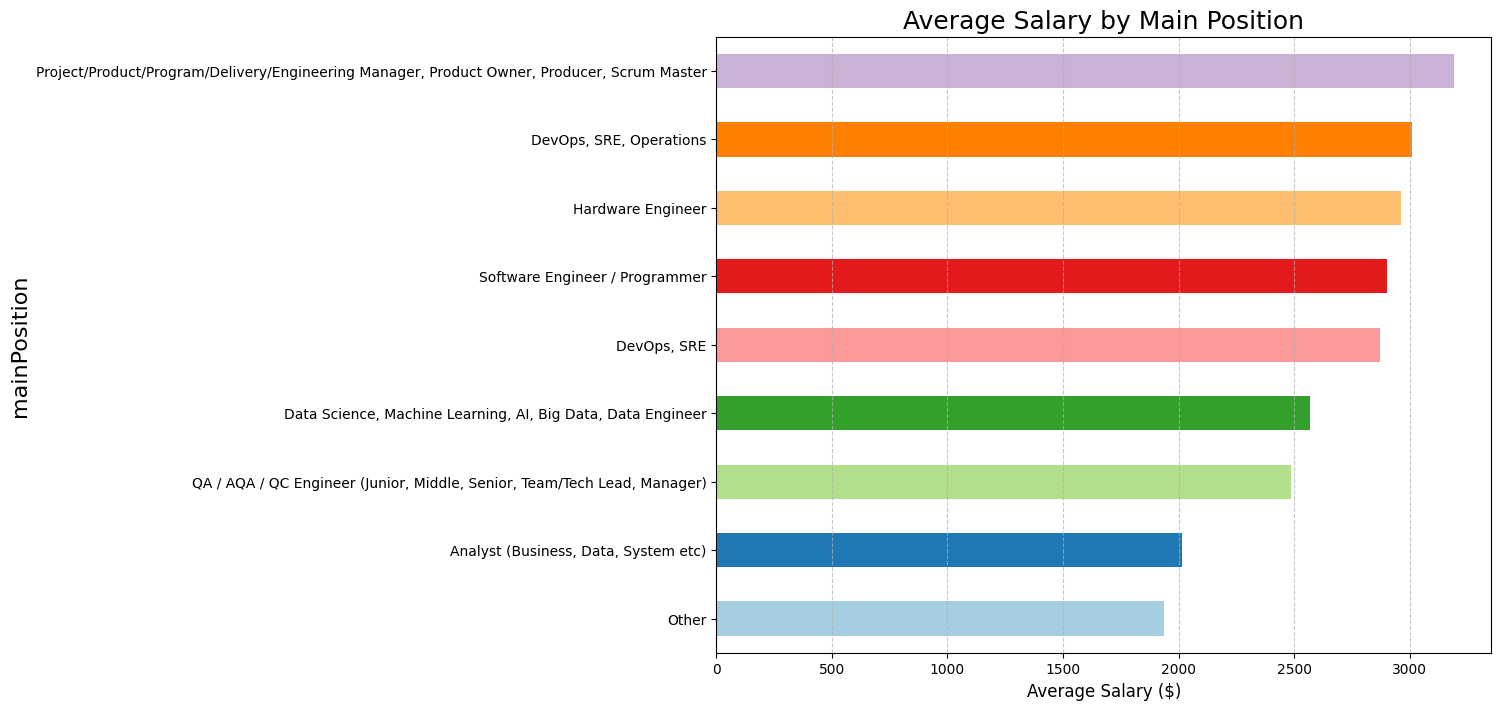

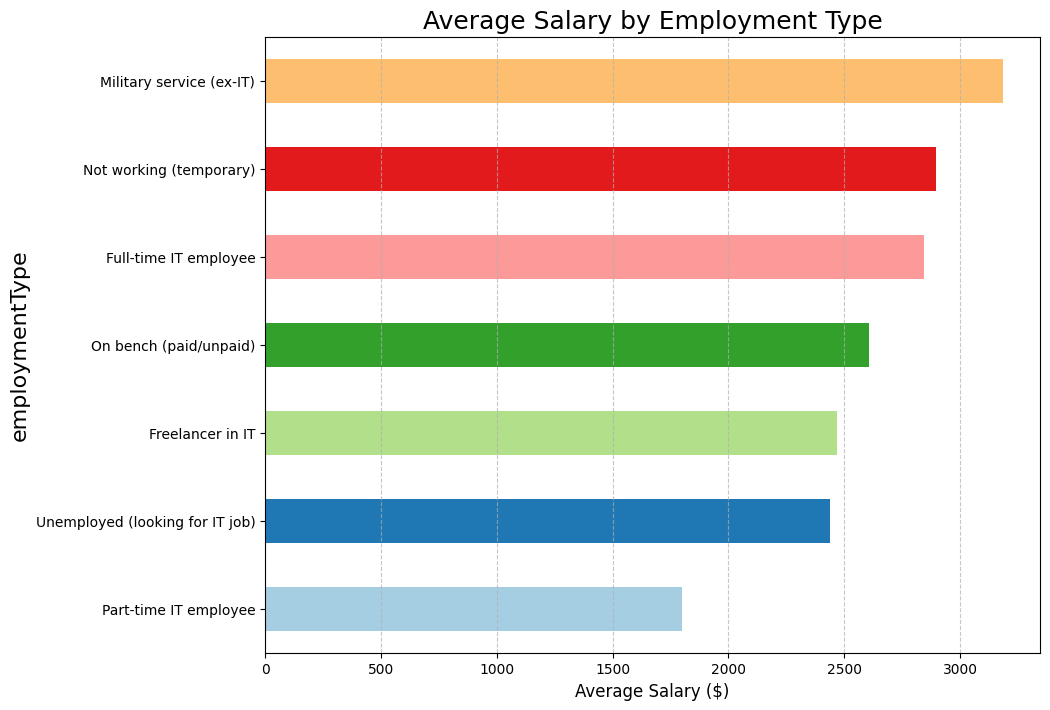

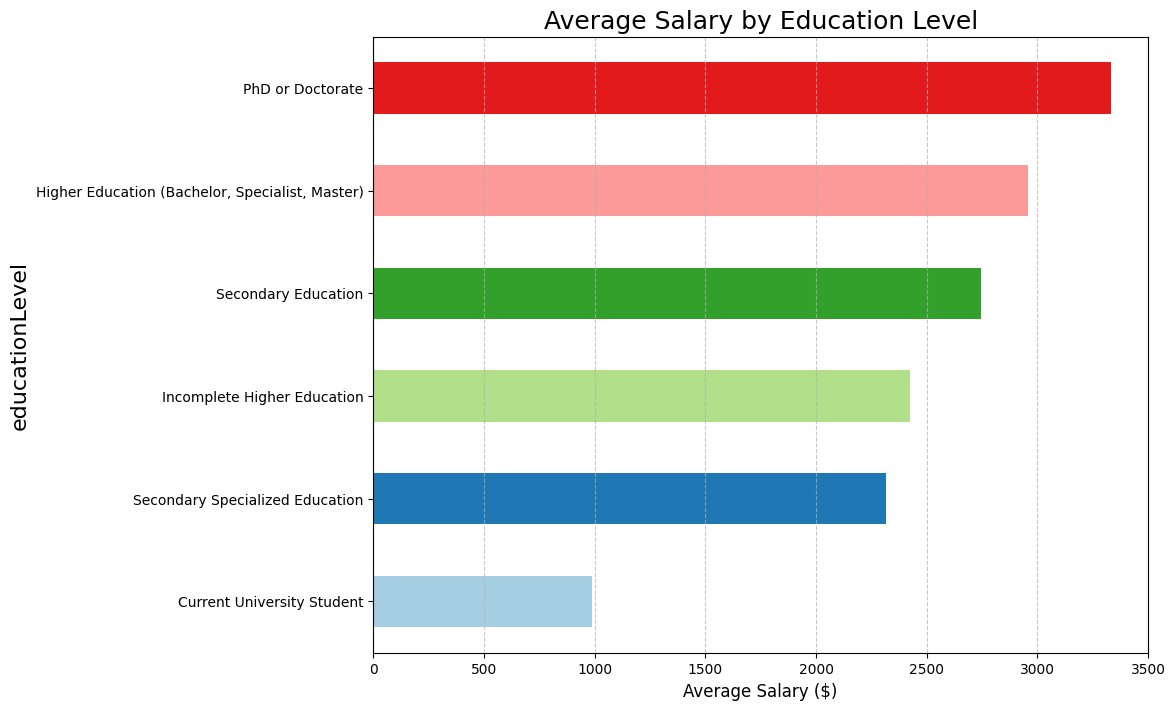

In [282]:
import pandas as pd
import matplotlib.pyplot as plt


def plot_average_salary_by_category(df, category_column, title):
    avg_salary_by_category = df.groupby(category_column)['salary'].mean().sort_values()

    colors = plt.cm.Paired(range(len(avg_salary_by_category)))

    plt.figure(figsize=(10, 8))
    avg_salary_by_category.plot(kind='barh', color=colors)
    plt.title(title, fontsize=18)
    plt.xlabel('Average Salary ($)', fontsize=12)
    plt.ylabel(category_column, fontsize=16)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

plot_average_salary_by_category(dou, 'mainPosition', 'Average Salary by Main Position')
plot_average_salary_by_category(dou, 'employmentType', 'Average Salary by Employment Type')
plot_average_salary_by_category(dou, 'educationLevel', 'Average Salary by Education Level')


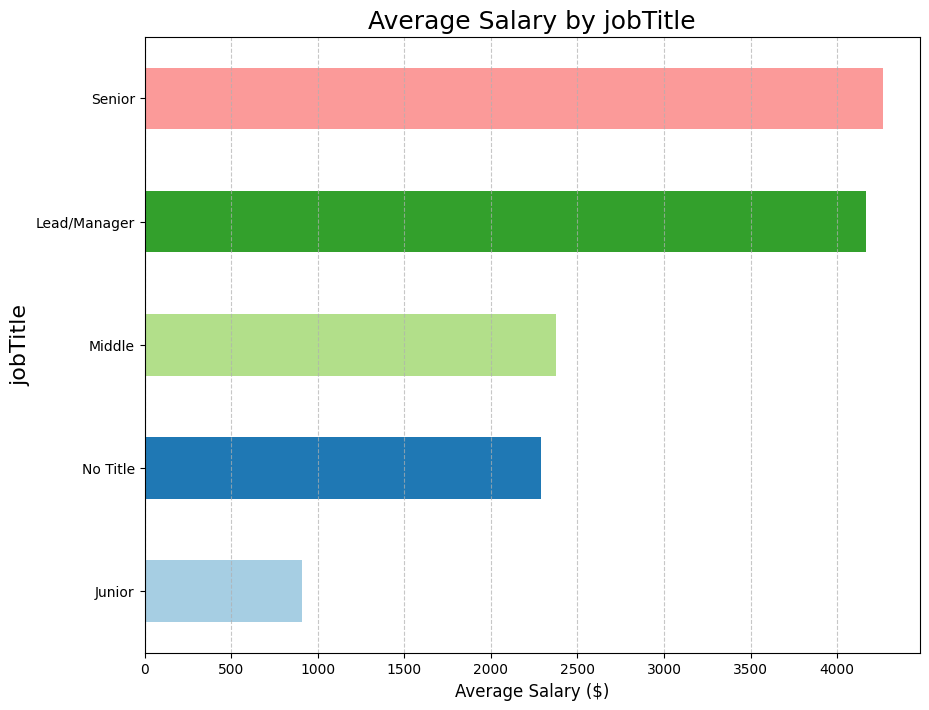

In [283]:
plot_average_salary_by_category(dou, 'jobTitle', 'Average Salary by jobTitle')

<ipython-input-282-a2939f339a7e>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_salary_by_category = df.groupby(category_column)['salary'].mean().sort_values()


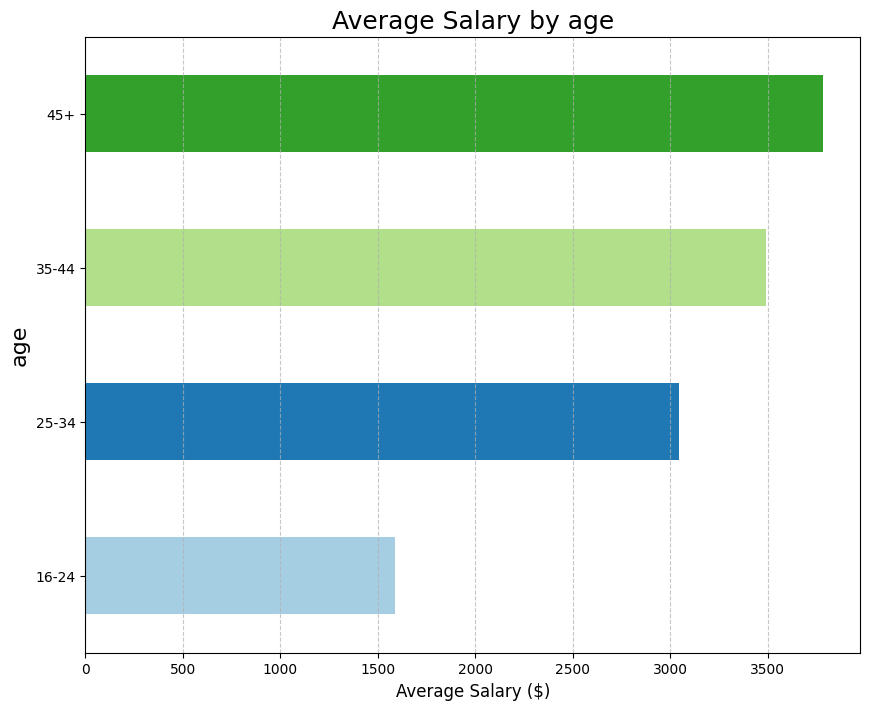

In [284]:
plot_average_salary_by_category(dou, 'age', 'Average Salary by age')

<ipython-input-282-a2939f339a7e>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_salary_by_category = df.groupby(category_column)['salary'].mean().sort_values()


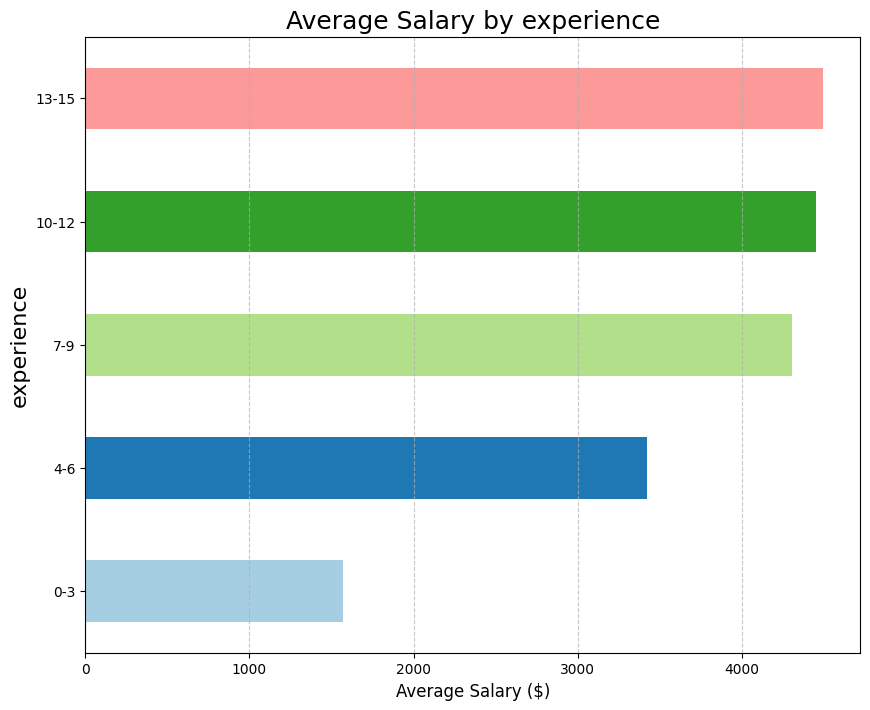

In [285]:
plot_average_salary_by_category(dou, 'experience', 'Average Salary by experience')

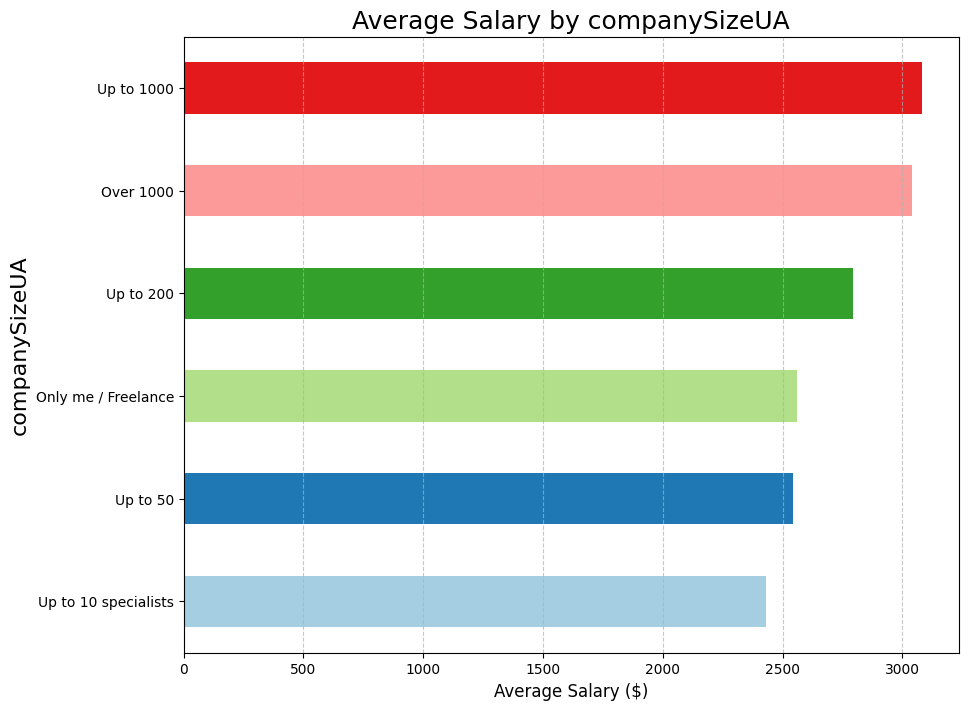

In [286]:
plot_average_salary_by_category(dou, 'companySizeUA', 'Average Salary by companySizeUA')

#Handle missing values

In [287]:
print(combined_data.isnull().sum())
print(combined_data.info())

projectDomain            0
currentLocation          0
mainSpecialization       0
englishProficiency       0
companySizeUA            0
age                      0
gender                   0
salary                   0
companyMainArea          0
experience               0
mainPosition             0
currentRegion         1121
employmentType           0
educationLevel           0
jobTitle                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 18609 entries, 8517 to 19134
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   projectDomain       18609 non-null  object  
 1   currentLocation     18609 non-null  object  
 2   mainSpecialization  18609 non-null  object  
 3   englishProficiency  18609 non-null  object  
 4   companySizeUA       18609 non-null  object  
 5   age                 18609 non-null  category
 6   gender              18609 non-null  object  
 7   salary              

In [288]:
# Fill missing 'age' values with the median
# combined_data['age'].fillna(combined_data['age'].median(), inplace=True)
combined_data['age'].fillna(combined_data['age'].mode()[0], inplace=True)


<ipython-input-288-bf46354b7df2>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['age'].fillna(combined_data['age'].mode()[0], inplace=True)


In [289]:
print(combined_data.isnull().sum())

projectDomain            0
currentLocation          0
mainSpecialization       0
englishProficiency       0
companySizeUA            0
age                      0
gender                   0
salary                   0
companyMainArea          0
experience               0
mainPosition             0
currentRegion         1121
employmentType           0
educationLevel           0
jobTitle                 0
dtype: int64


In [290]:
# Option 1: Drop rows with missing 'salary' values
combined_data.dropna(subset=['salary'], inplace=True)

# Option 2: Fill missing 'salary' values with the median
# combined_data['salary'].fillna(combined_data['salary'].median(), inplace=True)

In [291]:
region_counts = combined_data['currentRegion'].value_counts()

print(region_counts)

currentRegion
Central Ukraine     8984
Western Ukraine     5373
Eastern Ukraine     2211
Southern Ukraine     820
Other                100
Name: count, dtype: int64


In [292]:
# Fill missing 'currentRegion' values with "Unknown"
combined_data['currentRegion'].fillna('Other', inplace=True)


<ipython-input-292-582ca2afe3fa>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['currentRegion'].fillna('Other', inplace=True)


In [293]:
print(combined_data['currentRegion'].value_counts())

currentRegion
Central Ukraine     8984
Western Ukraine     5373
Eastern Ukraine     2211
Other               1221
Southern Ukraine     820
Name: count, dtype: int64


# ENCODING

##One-Hot Encoding

In [294]:
combined_data

,projectDomain,currentLocation,mainSpecialization,englishProficiency,companySizeUA,age,gender,salary,companyMainArea,experience,mainPosition,currentRegion,employmentType,educationLevel,jobTitle
8517,"Cloud Computing, Machine Learning, Uberfication",In Ukraine,Back-end Development,Intermediate,Up to 50,16-24,Male,520.0,Product,0-3,"Data Science, Machine Learning, AI, Big Data, ...",Western Ukraine,Full-time IT employee,Current University Student,Junior
707,Fintech / Banking / Capital Management,In Ukraine,Back-end Development,Advanced,Up to 10 specialists,16-24,Male,1000.0,Product,0-3,"Data Science, Machine Learning, AI, Big Data, ...",Central Ukraine,Full-time IT employee,Current University Student,Junior
23754,"Internet of Things, Security",In Ukraine,Back-end Development,Upper-Intermediate,Up to 1000,16-24,Male,1400.0,Outsourcing,0-3,"DevOps, SRE",Central Ukraine,Full-time IT employee,Current University Student,Junior
15964,Automotive,In Ukraine,Back-end Development,Pre-Intermediate,Up to 10 specialists,16-24,Male,800.0,Product,0-3,Hardware Engineer,Western Ukraine,Full-time IT employee,Current University Student,Junior
25411,Automotive,In Ukraine,Back-end Development,Intermediate,Up to 50,16-24,Male,1100.0,Outsourcing,0-3,Hardware Engineer,Central Ukraine,Full-time IT employee,Current University Student,Junior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22075,"Internet of Things, Security",In Ukraine,розробка бібліотек,Intermediate,Over 1000,25-34,Male,2800.0,Outsourcing,4-6,Hardware Engineer,Western Ukraine,Full-time IT employee,"Higher Education (Bachelor, Specialist, Master)",Senior
13857,"Cloud Computing, Machine Learning, Uberfication",In Ukraine,"розробка потрібного продукту. часом фронт, час...",Upper-Intermediate,Up to 200,16-24,Male,900.0,Outsourcing,0-3,Hardware Engineer,Southern Ukraine,Part-time IT employee,Current University Student,Junior
23005,Other,Abroad (plan to return),розробляю тестові фреймворки,Advanced,Over 1000,25-34,Male,4200.0,Product,10-12,"QA / AQA / QC Engineer (Junior, Middle, Senior...",Other,Full-time IT employee,"Higher Education (Bachelor, Specialist, Master)",Senior
14478,Automotive,In Ukraine,с++,Intermediate,Over 1000,25-34,Male,3000.0,Outsourcing,7-9,Hardware Engineer,Central Ukraine,Not working (temporary),"Higher Education (Bachelor, Specialist, Master)",Middle


In [295]:
combined_data

,projectDomain,currentLocation,mainSpecialization,englishProficiency,companySizeUA,age,gender,salary,companyMainArea,experience,mainPosition,currentRegion,employmentType,educationLevel,jobTitle
8517,"Cloud Computing, Machine Learning, Uberfication",In Ukraine,Back-end Development,Intermediate,Up to 50,16-24,Male,520.0,Product,0-3,"Data Science, Machine Learning, AI, Big Data, ...",Western Ukraine,Full-time IT employee,Current University Student,Junior
707,Fintech / Banking / Capital Management,In Ukraine,Back-end Development,Advanced,Up to 10 specialists,16-24,Male,1000.0,Product,0-3,"Data Science, Machine Learning, AI, Big Data, ...",Central Ukraine,Full-time IT employee,Current University Student,Junior
23754,"Internet of Things, Security",In Ukraine,Back-end Development,Upper-Intermediate,Up to 1000,16-24,Male,1400.0,Outsourcing,0-3,"DevOps, SRE",Central Ukraine,Full-time IT employee,Current University Student,Junior
15964,Automotive,In Ukraine,Back-end Development,Pre-Intermediate,Up to 10 specialists,16-24,Male,800.0,Product,0-3,Hardware Engineer,Western Ukraine,Full-time IT employee,Current University Student,Junior
25411,Automotive,In Ukraine,Back-end Development,Intermediate,Up to 50,16-24,Male,1100.0,Outsourcing,0-3,Hardware Engineer,Central Ukraine,Full-time IT employee,Current University Student,Junior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22075,"Internet of Things, Security",In Ukraine,розробка бібліотек,Intermediate,Over 1000,25-34,Male,2800.0,Outsourcing,4-6,Hardware Engineer,Western Ukraine,Full-time IT employee,"Higher Education (Bachelor, Specialist, Master)",Senior
13857,"Cloud Computing, Machine Learning, Uberfication",In Ukraine,"розробка потрібного продукту. часом фронт, час...",Upper-Intermediate,Up to 200,16-24,Male,900.0,Outsourcing,0-3,Hardware Engineer,Southern Ukraine,Part-time IT employee,Current University Student,Junior
23005,Other,Abroad (plan to return),розробляю тестові фреймворки,Advanced,Over 1000,25-34,Male,4200.0,Product,10-12,"QA / AQA / QC Engineer (Junior, Middle, Senior...",Other,Full-time IT employee,"Higher Education (Bachelor, Specialist, Master)",Senior
14478,Automotive,In Ukraine,с++,Intermediate,Over 1000,25-34,Male,3000.0,Outsourcing,7-9,Hardware Engineer,Central Ukraine,Not working (temporary),"Higher Education (Bachelor, Specialist, Master)",Middle


In [296]:
#One-Hot Encoding
df_encoded = pd.get_dummies(combined_data, columns=[
     'currentLocation', 'companyMainArea',
    'currentRegion', 'employmentType', 'jobTitle',
     'mainPosition',
     'age','experience'
    , 'projectDomain', 'mainSpecialization'

    # ,'englishProficiency'
    #  ,'companySizeUA','educationLevel','gender'
])

In [297]:
df_encoded.columns

Index(['englishProficiency', 'companySizeUA', 'gender', 'salary',
       'educationLevel', 'currentLocation_Abroad (plan to return)',
       'currentLocation_In Ukraine', 'companyMainArea_Freelance',
       'companyMainArea_Government Entity', 'companyMainArea_Other',
       ...
       'mainSpecialization_навчання спеціалістів', 'mainSpecialization_не web',
       'mainSpecialization_не розробник', 'mainSpecialization_підтримка',
       'mainSpecialization_робота з даними, налагодження роботи системи, моніторинг та ескалація, скриптування для спрощення роботи',
       'mainSpecialization_розробка бібліотек',
       'mainSpecialization_розробка потрібного продукту. часом фронт, часом бек',
       'mainSpecialization_розробляю тестові фреймворки',
       'mainSpecialization_с++',
       'mainSpecialization_я просто ва якому прийшлось трохи розбиратись з кодом'],
      dtype='object', length=204)

##LabelEncoding

In [298]:
#LabelEncoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df_encoded['englishProficiency'] = label_encoder.fit_transform(df_encoded['englishProficiency'])
df_encoded['companySizeUA'] = label_encoder.fit_transform(df_encoded['companySizeUA'])
df_encoded['educationLevel'] = label_encoder.fit_transform(df_encoded['educationLevel'])
df_encoded['gender'] = label_encoder.fit_transform(df_encoded['gender'])

print(df_encoded.head())

       englishProficiency  companySizeUA  gender  salary  educationLevel  \
8517                    2              5       1   520.0               0   
707                     0              2       1  1000.0               0   
23754                   5              3       1  1400.0               0   
15964                   4              2       1   800.0               0   
25411                   2              5       1  1100.0               0   

       currentLocation_Abroad (plan to return)  currentLocation_In Ukraine  \
8517                                     False                        True   
707                                      False                        True   
23754                                    False                        True   
15964                                    False                        True   
25411                                    False                        True   

       companyMainArea_Freelance  companyMainArea_Government Entity  \
851

## Outliers detection with  IQR

In [299]:
# calculate the first (Q1) and third (Q3) quartiles
Q1 = df_encoded['salary'].quantile(0.25)
Q3 = df_encoded['salary'].quantile(0.75)

# calculate the interquartile range (IQR)
IQR = Q3 - Q1

# determine the limits for the search for outliers
lower_bound = Q1 - 0.7 * IQR
upper_bound = Q3 + 0.7 * IQR

# filter the data, excluding outliers
df_encoded_no_outliers = df_encoded[
    (df_encoded['salary'] >= lower_bound) &
    (df_encoded['salary'] <= upper_bound)
]

# display information about the new data set
print(f"Data size before outlier removal: {df_encoded.shape[0]}")
print(f"Data size after outlier removal: {df_encoded_no_outliers.shape[0]}")

Data size before outlier removal: 18609
Data size after outlier removal: 18217


## Outliers detection with Z-Score (draft dont use now)

In [300]:
# from scipy import stats

# # Фільтруємо дані, виключаючи викиди (Z-Score > 3 або < -3)
# z_scores = stats.zscore(df_encoded['salary'])

# df_encoded_no_outliers = df_encoded[np.abs(z_scores) <= 3]

# # Виводимо інформацію про новий набір даних
# print(f"Розмір даних до видалення викидів: {df_encoded.shape[0]}")
# print(f"Розмір даних після видалення викидів: {df_encoded_no_outliers.shape[0]}")

# # Перевіряємо статистику зарплат
# print(df_encoded_no_outliers['salary'].describe())

## Scaling

In [301]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_columns = ['salary']

df_encoded[scaled_columns] = scaler.fit_transform(df_encoded[scaled_columns])

#PREPROCESSING FUNCTION

In [302]:
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler

def preprocess_data(df, training=True, label_encoders=None, scaler=None, reference_columns=None):
    """
    Preprocess data by applying One-Hot Encoding, Label Encoding, and Standard Scaling.

    Parameters:
    - df (pd.DataFrame): The input DataFrame to preprocess.
    - training (bool): If True, fit encoders and scaler; if False, use existing encoders/scaler.
    - label_encoders (dict): Pre-fitted label encoders (required for inference).
    - scaler (StandardScaler): Pre-fitted scaler (required for inference).
    - reference_columns (list): List of columns from training data to maintain column consistency.

    Returns:
    - df_processed (pd.DataFrame): Preprocessed DataFrame ready for model input.
    - label_encoders (dict): Fitted label encoders (if training).
    - scaler (StandardScaler): Fitted scaler (if training).
    """

    categorical_onehot = [
        'currentLocation', 'companyMainArea', 'currentRegion', 'employmentType',
        'jobTitle', 'mainPosition', 'age', 'experience', 'projectDomain', 'mainSpecialization'
    ]

    categorical_label = ['englishProficiency', 'companySizeUA', 'educationLevel', 'gender']

    numerical_features = ['salary']

    df = df.copy()

    # One-Hot Encoding
    df_encoded = pd.get_dummies(df, columns=categorical_onehot)

    # Label Encoding
    if training:
        label_encoders = {}
        for col in categorical_label:
            le = LabelEncoder()
            df_encoded[col] = le.fit_transform(df[col])
            label_encoders[col] = le
    else:
        for col in categorical_label:
            if col in df_encoded:
                df_encoded[col] = label_encoders[col].transform(df[col])

    # Ensure column consistency (important for inference)
    if reference_columns:
        missing_cols = set(reference_columns) - set(df_encoded.columns)
        for col in missing_cols:
            df_encoded[col] = 0  # Add missing columns with default value 0

        df_encoded = df_encoded[reference_columns]  # Reorder to match training

    # Standard Scaling
    if training:
        scaler = StandardScaler()
        df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])
    else:
        df_encoded[numerical_features] = scaler.transform(df_encoded[numerical_features])

    return df_encoded, label_encoders, scaler


In [303]:
df_encoded, label_encoders, scaler = preprocess_data(combined_data)


# Splitting into test train validation datasets

In [304]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('salary', axis=1)
y = df_encoded['salary']

# divide the data into a training set and a test and validation set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, random_state=1)

# divide the test and validation set into validation and test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=1)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")


Training set: (14887, 203), (14887,)
Validation set: (1861, 203), (1861,)
Test set: (1861, 203), (1861,)


#PREDICTIONS

In [305]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(model, X_val, y_val, scaler):
    y_val_pred = model.predict(X_val)

    y_val_pred_original = scaler.inverse_transform(y_val_pred.reshape(-1, 1))
    y_val_original = scaler.inverse_transform(y_val.values.reshape(-1, 1))

    errors = abs(y_val_original - y_val_pred_original)

    result_df = pd.DataFrame({
        'Predicted Salary': y_val_pred_original.flatten(),
        'Actual Salary': y_val_original.flatten(),
        'Error': errors.flatten()
    })

    top_15_df = result_df.sort_values(by='Error').head(15)

    return top_15_df


# RandomForestRegressor

In [306]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

params = {
    'n_estimators': 400,
    'min_samples_split': 10,
    'min_samples_leaf': 2,
    'max_features': 0.5,
    'max_depth': None
}

rf_model = RandomForestRegressor(**params)

rf_model.fit(X_train, y_train)

y_val_pred_rf = rf_model.predict(X_val)

y_test_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_test_pred_rf)
r2_rf = r2_score(y_test, y_test_pred_rf)

print(f"Mean Squared Error: {mse_rf}")
print(f"R^2 Score: {r2_rf}")


Mean Squared Error: 0.18817858682138108
R^2 Score: 0.8119543852754271


In [307]:
 print("_____________RandomForestRegressor___________________")

# Prediction for training data
y_train_pred_dt = rf_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred_dt)
print(f"MSE on training data: {mse_train}")

# Prediction for validation data
y_val_pred_dt = rf_model.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred_dt)
print(f"MSE on validation data {mse_val}")

# Prediction for test data
y_test_pred_dt = rf_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred_dt)
print(f"MSE on test data {mse_test}")

print("______________________________________")

from sklearn.metrics import r2_score

# Prediction for training data
y_train_pred_dt = rf_model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred_dt)

# Prediction for validation data
y_val_pred_dt = rf_model.predict(X_val)
r2_val = r2_score(y_val, y_val_pred_dt)

# Prediction for test data
y_test_pred_dt = rf_model.predict(X_test)
r2_test = r2_score(y_test, y_test_pred_dt)

print(f"R² MSE on training data {r2_train}")
print(f"R² Score on validation data: {r2_val}")
print(f"R² Score on test data: {r2_test}")


_____________RandomForestRegressor___________________
MSE on training data: 0.09966213964328151
MSE on validation data 0.19121665872170915
MSE on test data 0.18817858682138108
______________________________________
R² MSE on training data 0.9002497934819826
R² Score on validation data: 0.8099064236959596
R² Score on test data: 0.8119543852754271


In [308]:
top_15_predictions = evaluate_model(rf_model, X_val, y_val, scaler)


print(top_15_predictions)

      Predicted Salary  Actual Salary     Error
1828       2900.207907         2900.0  0.207907
243        2999.778959         3000.0  0.221041
1250       1049.680924         1050.0  0.319076
476        2000.475105         2000.0  0.475105
1214        800.859478          800.0  0.859478
1073       4402.136459         4400.0  2.136459
924         897.638853          900.0  2.361147
1546       1947.012776         1950.0  2.987224
233        4596.718108         4600.0  3.281892
167        3995.425485         4000.0  4.574515
1071       2505.045884         2500.0  5.045884
565        1405.500293         1400.0  5.500293
491        2244.230680         2250.0  5.769320
1333       1056.458082         1050.0  6.458082
1725       1009.130102         1000.0  9.130102


In [309]:
# Load encoders and scaler
# label_encoders = joblib.load('label_encoders.pkl')
# scaler = joblib.load('scaler.pkl')
# reference_columns = joblib.load('reference_columns.pkl')


# # Preprocess training data and store encoders, scaler, and reference columns
# df_encoded, label_encoders, scaler = preprocess_data(combined_data, training=True)

reference_columns = df_encoded.columns.tolist()

index=108

# new_data = combined_data.iloc[[1]].copy()
new_data = combined_data.loc[[index]]
# pd.DataFrame([{
#     'currentLocation': 'In Ukraine',
#     'companyMainArea': 'Product',
#     'currentRegion': 'Western Ukraine',
#     'employmentType': 'Full-time IT employee',
#     'jobTitle': 'Junior',
#     'mainPosition': 'Data Science, Machine Learning, AI, Big Data, Data Engineer',
#     'age': '16-24',
#     'experience': '0-3',
#     'projectDomain': 'Cloud Computing, Machine Learning, Uberfication',
#     'mainSpecialization': 'Back-end розробка',
#     'englishProficiency': 'Intermediate',
#     'companySizeUA': 'Up to 50',
#     'educationLevel': 'Current University Student',
#     'gender': 'Male'
# }])
# combined_data.iloc[0]

# reference_columns = [col for col in df_encoded.columns if col != 'salary']

# Preprocess new data
new_data_encoded, _, _ = preprocess_data(new_data, training=False,
                                         label_encoders=label_encoders,
                                         scaler=scaler,
                                         reference_columns=reference_columns)
new_data_encoded = new_data_encoded.drop('salary', axis=1, errors='ignore')
# Predict Salary
predicted_salary = rf_model.predict(new_data_encoded)

# Inverse scale the predicted salary
predicted_salary_scaled = predicted_salary[0]
predicted_salary_original = scaler.inverse_transform([[predicted_salary_scaled]])[0][0]

print(f"Predicted Salary: {predicted_salary_original}")
# Predicted Salary: 2413.732193732194
print(f"Real salary is {combined_data.loc[index, 'salary']}")


Predicted Salary: 1960.232726354323
Real salary is 2300.0


<ipython-input-302-775035792d18>:52: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_encoded[col] = 0  # Add missing columns with default value 0
<ipython-input-302-775035792d18>:52: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_encoded[col] = 0  # Add missing columns with default value 0
<ipython-input-302-775035792d18>:52: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axi

#UI

In [310]:
import pandas as pd

unique_values = {col: combined_data[col].unique().tolist() for col in combined_data.columns}

In [311]:
import gradio as gr
import pandas as pd

# Assuming unique_values is a dictionary of unique values for each column
def predict_salary(currentLocation, companyMainArea, currentRegion, employmentType, jobTitle, mainPosition, age, experience, projectDomain, mainSpecialization, englishProficiency, companySizeUA, educationLevel, gender):
    # Create a DataFrame from the input values
    new_data = pd.DataFrame([{
        'currentLocation': currentLocation,
        'companyMainArea': companyMainArea,
        'currentRegion': currentRegion,
        'employmentType': employmentType,
        'jobTitle': jobTitle,
        'mainPosition': mainPosition,
        'age': age,
        'experience': experience,
        'projectDomain': projectDomain,
        'mainSpecialization': mainSpecialization,
        'englishProficiency': englishProficiency,
        'companySizeUA': companySizeUA,
        'educationLevel': educationLevel,
        'gender': gender
    }])

    # Preprocess the data
    new_data_encoded, _, _ = preprocess_data(new_data, training=False,
                                             label_encoders=label_encoders,
                                             scaler=scaler,
                                             reference_columns=reference_columns)
    new_data_encoded = new_data_encoded.drop('salary', axis=1, errors='ignore')

    # Predict Salary
    predicted_salary = rf_model.predict(new_data_encoded)

    # Inverse scale the predicted salary
    predicted_salary_scaled = predicted_salary[0]
    predicted_salary_original = scaler.inverse_transform([[predicted_salary_scaled]])[0][0]

    return f"Predicted Salary: {predicted_salary_original}"

# Create Gradio interface
inputs = [
    gr.Dropdown(label="Current Location", choices=unique_values['currentLocation']),
    gr.Dropdown(label="Company Main Area", choices=unique_values['companyMainArea']),
    gr.Dropdown(label="Current Region", choices=unique_values['currentRegion']),
    gr.Dropdown(label="Employment Type", choices=unique_values['employmentType']),
    gr.Dropdown(label="Job Title", choices=unique_values['jobTitle']),
    gr.Dropdown(label="Main Position", choices=unique_values['mainPosition']),
    gr.Dropdown(label="Age", choices=unique_values['age']),
    gr.Dropdown(label="Experience", choices=unique_values['experience']),
    gr.Dropdown(label="Project Domain", choices=unique_values['projectDomain']),
    gr.Dropdown(label="Main Specialization", choices=unique_values['mainSpecialization']),
    gr.Dropdown(label="English Proficiency", choices=unique_values['englishProficiency']),
    gr.Dropdown(label="Company Size UA", choices=unique_values['companySizeUA']),
    gr.Dropdown(label="Education Level", choices=unique_values['educationLevel']),
    gr.Dropdown(label="Gender", choices=unique_values['gender'])
]

output = gr.Textbox(label="Predicted Salary")

interface = gr.Interface(fn=predict_salary, inputs=inputs, outputs=output, title="Salary Prediction")
interface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ba782119bc85f67b0a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


#Randomized Search for  Random Forest Optimization (uncomment to use)

In [312]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score

# # Define the parameter grid
# param_dist = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_depth': [10, 20, 30, 40, None],
#     'max_features': ['auto', 'sqrt', 'log2', 0.5],
#     'min_samples_split': [2, 5, 10, 20],
#     'min_samples_leaf': [1, 2, 4, 10]
# }

# # Create RandomizedSearchCV object
# random_search = RandomizedSearchCV(
#     estimator=RandomForestRegressor(random_state=42),
#     param_distributions=param_dist,
#     n_iter=100,  # Number of parameter combinations to try
#     scoring='r2',  # Optimize for R^2 score
#     cv=5,  # 5-fold cross-validation
#     random_state=42,
#     n_jobs=-1  # Use all available CPU cores
# )

# # Fit RandomizedSearchCV
# random_search.fit(X_train, y_train)

# # Get the best parameters
# best_params = random_search.best_params_
# print("Best hyperparameters:", best_params)

# # Use the best model for predictions
# best_rf_model = random_search.best_estimator_
# y_val_pred_rf_optimized = best_rf_model.predict(X_val)

# # Evaluate the optimized model on the validation set
# mse_rf_optimized = mean_squared_error(y_val, y_val_pred_rf_optimized)
# r2_rf_optimized = r2_score(y_val, y_val_pred_rf_optimized)

# print(f"Optimized Mean Squared Error (Validation): {mse_rf_optimized}")
# print(f"Optimized R^2 Score (Validation): {r2_rf_optimized}")


# DecisionTreeRegressor

In [313]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

dt_model = DecisionTreeRegressor(
    max_depth=10,
    max_features=None,
    min_samples_leaf=15,
    min_samples_split=12,
    random_state=42
)

dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=15, min_samples_split=12,
                      random_state=42)

In [314]:
# Prediction for validation data
y_val_pred_dt = dt_model.predict(X_val)

# Evaluation of the model on the validation set
mse_dt = mean_squared_error(y_val, y_val_pred_dt)
r2_dt = r2_score(y_val, y_val_pred_dt)

print(f"Mean Squared Error: {mse_dt}")
print(f"R^2 Score: {r2_dt}")

Mean Squared Error: 0.20449141781480643
R^2 Score: 0.7967096319130115


In [315]:
print("_____________DecisionTreeRegressor___________________")


# Prediction for training data
y_train_pred_dt = dt_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred_dt)
print(f"MSE for training data: {mse_train}")

# Prediction for validation data
y_val_pred_dt = dt_model.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred_dt)
print(f"MSE for validation data: {mse_val}")

# Prediction for test data
y_test_pred_dt = dt_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred_dt)
print(f"MSE for test data: {mse_test}")

print("______________________________________")

from sklearn.metrics import r2_score

# Prediction for training data
y_train_pred_dt = dt_model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred_dt)

# Prediction for validation data
y_val_pred_dt = dt_model.predict(X_val)
r2_val = r2_score(y_val, y_val_pred_dt)

# Prediction for test data
y_test_pred_dt = dt_model.predict(X_test)
r2_test = r2_score(y_test, y_test_pred_dt)

print(f"R² Score for training data: {r2_train}")
print(f"R² Score for validation data: {r2_val}")
print(f"R² Score for test data: {r2_test}")

print("______________________________________")

_____________DecisionTreeRegressor___________________
MSE for training data: 0.19189351441142213
MSE for validation data: 0.20449141781480643
MSE for test data: 0.2010959552777505
______________________________________
R² Score for training data: 0.8079369180661788
R² Score for validation data: 0.7967096319130115
R² Score for test data: 0.7990461445821995
______________________________________


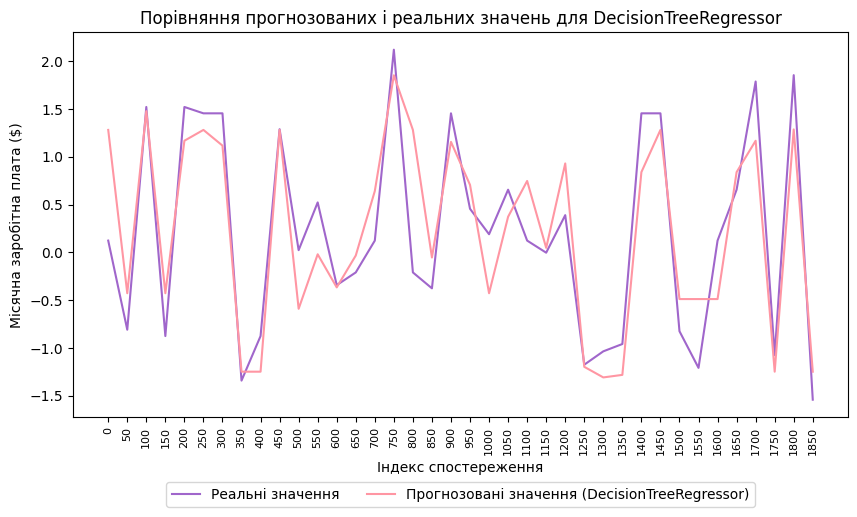

Mean Squared Error: 0.20449141781480643
R^2 Score: 0.7967096319130115


In [316]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

y_val_pred_dt = dt_model.predict(X_val)

indexs = np.arange(0, len(y_val_pred_dt), 50)

plt.figure(figsize=(10, 5))
plt.plot(indexs, y_val.values[indexs], label='Реальні значення', color='#A066CB')
plt.plot(indexs, y_val_pred_dt[indexs], label='Прогнозовані значення (DecisionTreeRegressor)', color='#FF96A3')

plt.xlabel("Індекс спостереження")
plt.xticks(indexs, rotation='vertical', fontsize=8)
plt.ylabel("Місячна заробітна плата ($)")
plt.title("Порівняння прогнозованих і реальних значень для DecisionTreeRegressor")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.show()

# Обчислення метрик
mse_dt = mean_squared_error(y_val, y_val_pred_dt)
r2_dt = r2_score(y_val, y_val_pred_dt)

print(f"Mean Squared Error: {mse_dt}")
print(f"R^2 Score: {r2_dt}")


In [317]:
y_val_pred_dt_original = scaler.inverse_transform(y_val_pred_dt.reshape(-1, 1))
y_val_original = scaler.inverse_transform(y_val.values.reshape(-1, 1))  # Convert Series to NumPy array

errors = abs(y_val_original - y_val_pred_dt_original)

result_df = pd.DataFrame({
    'Predicted Salary': y_val_pred_dt_original.flatten(),
    'Actual Salary': y_val_original.flatten(),
    'Error': errors.flatten()
})

top_15_df = result_df.sort_values(by='Error').head(15)

print(top_15_df)


      Predicted Salary  Actual Salary     Error
463        5598.214286         5600.0  1.785714
487        4747.382075         4750.0  2.617925
1840       4747.382075         4750.0  2.617925
149        1004.090909         1000.0  4.090909
322         895.844221          900.0  4.155779
7           895.844221          900.0  4.155779
553        4492.761232         4500.0  7.238768
846        4492.761232         4500.0  7.238768
1589       4492.761232         4500.0  7.238768
1184       4492.761232         4500.0  7.238768
1643       4492.761232         4500.0  7.238768
1332       4492.761232         4500.0  7.238768
733        4492.761232         4500.0  7.238768
1362       3757.352941         3750.0  7.352941
1782       3192.122530         3200.0  7.877470


In [318]:
top_15_predictions = evaluate_model(dt_model, X_val, y_val, scaler)

print(top_15_predictions)


      Predicted Salary  Actual Salary     Error
463        5598.214286         5600.0  1.785714
487        4747.382075         4750.0  2.617925
1840       4747.382075         4750.0  2.617925
149        1004.090909         1000.0  4.090909
322         895.844221          900.0  4.155779
7           895.844221          900.0  4.155779
553        4492.761232         4500.0  7.238768
846        4492.761232         4500.0  7.238768
1589       4492.761232         4500.0  7.238768
1184       4492.761232         4500.0  7.238768
1643       4492.761232         4500.0  7.238768
1332       4492.761232         4500.0  7.238768
733        4492.761232         4500.0  7.238768
1362       3757.352941         3750.0  7.352941
1782       3192.122530         3200.0  7.877470


#Using Randomized SearchCV for Optimization DecisionTreeRegressor (uncomment to use)

In [319]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint


# param_dist = {
#     'max_depth': [3, 5, 10, None],
#     'min_samples_split': randint(2, 20),
#     'min_samples_leaf': randint(1, 20),
#     'max_features': [None, 'sqrt', 'log2']
# }


# random_search = RandomizedSearchCV(
#     estimator=DecisionTreeRegressor(random_state=42),
#     param_distributions=param_dist,
#     scoring='r2',
#     n_iter=100,  # Number of parameter settings sampled
#     cv=5,
#     random_state=42,
#     n_jobs=-1
# )


# random_search.fit(X_train, y_train)


# print("Best hyperparameters:", random_search.best_params_)
# print("Best R^2 score:", random_search.best_score_)


# GradientBoostingRegressor

In [320]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


gb_model = GradientBoostingRegressor(
    subsample=0.8,
    n_estimators=300,
    min_samples_split=20,
    min_samples_leaf=2,
    max_features=None,
    max_depth=7,
    learning_rate=0.05,
    random_state=42
)

gb_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=7, min_samples_leaf=2,
                          min_samples_split=20, n_estimators=300,
                          random_state=42, subsample=0.8)

In [321]:
# Predict on the validation set
y_val_pred_gb = gb_model.predict(X_val)

# Evaluate the model on the validation set
mse_gb = mean_squared_error(y_val, y_val_pred_gb)
r2_gb = r2_score(y_val, y_val_pred_gb)


print(f"Mean Squared Error: {mse_gb}")
print(f"R^2 Score: {r2_gb}")

Mean Squared Error: 0.18764630413632055
R^2 Score: 0.813455808338214


In [322]:
print("_____________GradientBoostingRegressor___________________")

# Prediction for training data
y_train_pred_dt = gb_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred_dt)
print(f"MSE for training data: {mse_train}")

# Prediction for validation data
y_val_pred_dt = gb_model.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred_dt)
print(f"MSE for validation data: {mse_val}")

# Prediction for test data
y_test_pred_dt = gb_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred_dt)
print(f"MSE for test data:: {mse_test}")

print("______________________________________")

from sklearn.metrics import r2_score

# Prediction for training data
y_train_pred_dt = gb_model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred_dt)

# Prediction for validation data
y_val_pred_dt = gb_model.predict(X_val)
r2_val = r2_score(y_val, y_val_pred_dt)

# Prediction for test data
y_test_pred_dt = gb_model.predict(X_test)
r2_test = r2_score(y_test, y_test_pred_dt)

print(f"R² Score for training data: {r2_train}")
print(f"R² Score for validation data: {r2_val}")
print(f"R² Score for test data: {r2_test}")
print("______________________________________")

_____________GradientBoostingRegressor___________________
MSE for training data: 0.1303213355106687
MSE for validation data: 0.18764630413632055
MSE for test data:: 0.1850688831499221
______________________________________
R² Score for training data: 0.8695635054854116
R² Score for validation data: 0.813455808338214
R² Score for test data: 0.8150618915458712
______________________________________


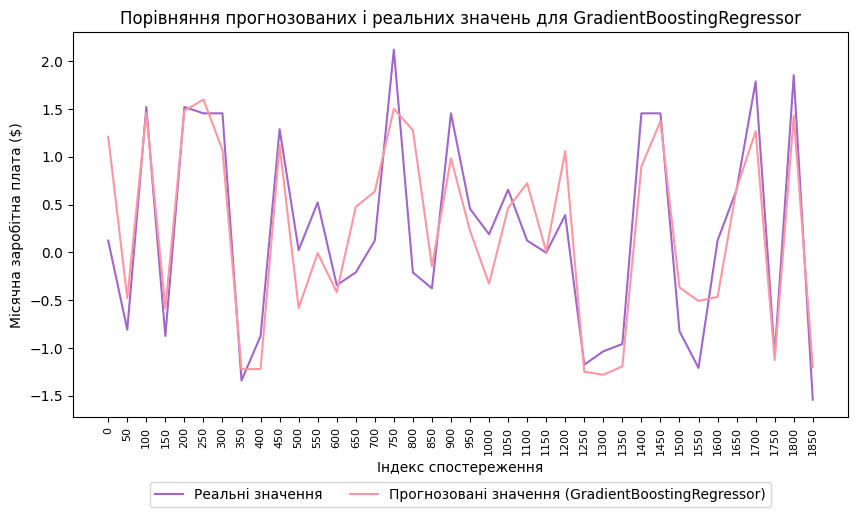

Mean Squared Error: 0.18764630413632055
R^2 Score: 0.813455808338214


In [323]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

y_val_pred_gb = gb_model.predict(X_val)

indexs = np.arange(0, len(y_val_pred_gb), 50)

plt.figure(figsize=(10, 5))
plt.plot(indexs, y_val.values[indexs], label='Реальні значення', color='#A066CB')
plt.plot(indexs, y_val_pred_gb[indexs], label='Прогнозовані значення (GradientBoostingRegressor)', color='#FF96A3')

plt.xlabel("Індекс спостереження")
plt.xticks(indexs, rotation='vertical', fontsize=8)
plt.ylabel("Місячна заробітна плата ($)")
plt.title("Порівняння прогнозованих і реальних значень для GradientBoostingRegressor")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.show()

mse_gb = mean_squared_error(y_val, y_val_pred_gb)
r2_gb = r2_score(y_val, y_val_pred_gb)

print(f"Mean Squared Error: {mse_gb}")
print(f"R^2 Score: {r2_gb}")


#Using Randomized Search for Optimization GradientBoostingRegressor (uncomment to use)

In [324]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np

# param_dist = {
#     'n_estimators': [50, 100, 200, 300],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'max_depth': [3, 5, 7, 10],
#     'min_samples_split': [2, 5, 10, 20],
#     'min_samples_leaf': [1, 2, 5, 10],
#     'subsample': [0.6, 0.8, 1.0],
#     'max_features': [None, 'sqrt', 'log2']
# }

# random_search = RandomizedSearchCV(
#     estimator=GradientBoostingRegressor(random_state=42),
#     param_distributions=param_dist,
#     n_iter=100,  # Number of parameter combinations to try
#     scoring='r2',  # Optimize for R^2 score
#     cv=5,  # 5-fold cross-validation
#     random_state=42,
#     n_jobs=-1  # Use all available cores
# )

# random_search.fit(X_train, y_train)

# best_params = random_search.best_params_
# best_score = random_search.best_score_

# print("Best hyperparameters:", best_params)
# print("Best R^2 score during CV:", best_score)



In [325]:
# best_gb_model = random_search.best_estimator_
# y_val_pred_gb_optimized = best_gb_model.predict(X_val)

# mse_gb_optimized = mean_squared_error(y_val, y_val_pred_gb_optimized)
# r2_gb_optimized = r2_score(y_val, y_val_pred_gb_optimized)

# print(f"Optimized Mean Squared Error: {mse_gb_optimized}")
# print(f"Optimized R^2 Score: {r2_gb_optimized}")


# Neural Networks (MLPRegressor)

In [326]:
from sklearn.neural_network import MLPRegressor

In [327]:
mlpr_model = MLPRegressor(
    solver='sgd',
    max_iter=500,
    learning_rate_init=0.01,
    hidden_layer_sizes=(100, 100),
    alpha=0.01,
    activation='tanh',
    random_state=42  # For reproducibility
)
mlpr_model.fit(X_train, y_train)

MLPRegressor(activation='tanh', alpha=0.01, hidden_layer_sizes=(100, 100),
             learning_rate_init=0.01, max_iter=500, random_state=42,
             solver='sgd')

In [328]:
y_val_pred_mlpr = mlpr_model.predict(X_val)


In [329]:
mse_mlpr = mean_squared_error(y_val, y_val_pred_mlpr)
r2_mlpr = r2_score(y_val, y_val_pred_mlpr)

print(f"Mean Squared Error: {mse_mlpr}")
print(f"R^2 Score: {r2_mlpr}")

Mean Squared Error: 0.197130789155616
R^2 Score: 0.8040270290217428


In [330]:
print("_____________Neural Networks (MLPRegressor)___________________")

y_train_pred_dt = mlpr_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred_dt)
print(f"MSE for taining data: {mse_train}")

y_val_pred_dt = mlpr_model.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred_dt)
print(f"MSE for validation data: {mse_val}")

y_test_pred_dt = mlpr_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred_dt)
print(f"MSE for test data: {mse_test}")

print("______________________________________")

from sklearn.metrics import r2_score

y_train_pred_dt = mlpr_model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred_dt)

y_val_pred_dt = mlpr_model.predict(X_val)
r2_val = r2_score(y_val, y_val_pred_dt)

y_test_pred_dt = mlpr_model.predict(X_test)
r2_test = r2_score(y_test, y_test_pred_dt)

print(f"R² Score for training data: {r2_train}")
print(f"R² Score for validation data: {r2_val}")
print(f"R² Score for test data: {r2_test}")
print("______________________________________")

_____________Neural Networks (MLPRegressor)___________________
MSE for taining data: 0.17211529359724143
MSE for validation data: 0.197130789155616
MSE for test data: 0.19345401380791277
______________________________________
R² Score for training data: 0.8277326159895324
R² Score for validation data: 0.8040270290217428
R² Score for test data: 0.8066826860487846
______________________________________


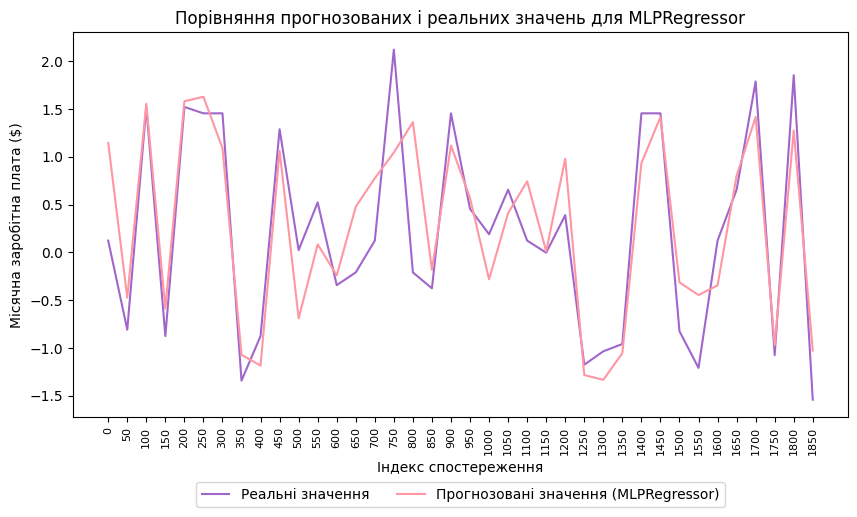

Mean Squared Error: 0.197130789155616
R^2 Score: 0.8040270290217428


In [331]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Отримуємо прогнозовані значення для валідаційного набору
y_val_pred_mlpr = mlpr_model.predict(X_val)

# Побудова графіка для порівняння прогнозованих і реальних значень
indexs = np.arange(0, len(y_val_pred_mlpr), 50)  # Вибираємо кожне 50-те значення для наочності

plt.figure(figsize=(10, 5))
plt.plot(indexs, y_val.values[indexs], label='Реальні значення', color='#A066CB')
plt.plot(indexs, y_val_pred_mlpr[indexs], label='Прогнозовані значення (MLPRegressor)', color='#FF96A3')

plt.xlabel("Індекс спостереження")
plt.xticks(indexs, rotation='vertical', fontsize=8)
plt.ylabel("Місячна заробітна плата ($)")
plt.title("Порівняння прогнозованих і реальних значень для MLPRegressor")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.show()

# Обчислення метрик
mse_mlpr = mean_squared_error(y_val, y_val_pred_mlpr)
r2_mlpr = r2_score(y_val, y_val_pred_mlpr)

print(f"Mean Squared Error: {mse_mlpr}")
print(f"R^2 Score: {r2_mlpr}")


# VotingRegressor

In [332]:
from sklearn.ensemble import VotingRegressor

voting_model = VotingRegressor([
    ('rf', rf_model),
    ('gb', gb_model),
    # ('dt', dt_model),
])

voting_model.fit(X_train, y_train)

VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(max_features=0.5,
                                                   min_samples_leaf=2,
                                                   min_samples_split=10,
                                                   n_estimators=400)),
                            ('gb',
                             GradientBoostingRegressor(learning_rate=0.05,
                                                       max_depth=7,
                                                       min_samples_leaf=2,
                                                       min_samples_split=20,
                                                       n_estimators=300,
                                                       random_state=42,
                                                       subsample=0.8))])

In [333]:
y_val_pred_voting = voting_model.predict(X_val)

mse_voting = mean_squared_error(y_val, y_val_pred_voting)
r2_voting = r2_score(y_val, y_val_pred_voting)

print(f"Mean Squared Error: {mse_voting}")
print(f"R^2 Score: {r2_voting}")


Mean Squared Error: 0.18610638200945653
R^2 Score: 0.8149866859630099


In [334]:
print("_____________VotingRegressor___________________")

y_train_pred_dt = voting_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred_dt)
print(f"MSE for training data:: {mse_train}")

y_val_pred_dt = voting_model.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred_dt)
print(f"MSE for validation data: {mse_val}")

y_test_pred_dt = voting_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred_dt)
print(f"MSE for test data: {mse_test}")

print("______________________________________")

from sklearn.metrics import r2_score

y_train_pred_dt = voting_model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred_dt)

y_val_pred_dt = voting_model.predict(X_val)
r2_val = r2_score(y_val, y_val_pred_dt)

y_test_pred_dt = voting_model.predict(X_test)
r2_test = r2_score(y_test, y_test_pred_dt)

print(f"R² Score for training data: {r2_train}")
print(f"R² Score for validation data: {r2_val}")
print(f"R² Score for test data: {r2_test}")
print("______________________________________")

_____________VotingRegressor___________________
MSE for training data:: 0.1121200824740989
MSE for validation data: 0.18610638200945653
MSE for test data: 0.18377241590683402
______________________________________
R² Score for training data: 0.887780842136852
R² Score for validation data: 0.8149866859630099
R² Score for test data: 0.8163574426700179
______________________________________


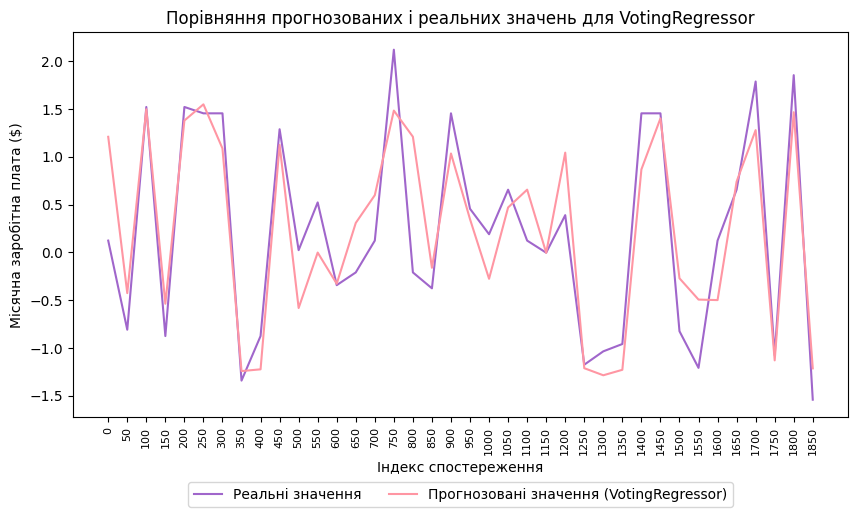

Mean Squared Error: 0.18610638200945653
R^2 Score: 0.8149866859630099


In [335]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

y_val_pred_voting = voting_model.predict(X_val)

indexs = np.arange(0, len(y_val_pred_voting), 50)

plt.figure(figsize=(10, 5))
plt.plot(indexs, y_val.values[indexs], label='Реальні значення', color='#A066CB')
plt.plot(indexs, y_val_pred_voting[indexs], label='Прогнозовані значення (VotingRegressor)', color='#FF96A3')

plt.xlabel("Індекс спостереження")
plt.xticks(indexs, rotation='vertical', fontsize=8)
plt.ylabel("Місячна заробітна плата ($)")
plt.title("Порівняння прогнозованих і реальних значень для VotingRegressor")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.show()

mse_voting = mean_squared_error(y_val, y_val_pred_voting)
r2_voting = r2_score(y_val, y_val_pred_voting)

print(f"Mean Squared Error: {mse_voting}")
print(f"R^2 Score: {r2_voting}")


# SVM (Support Vector Machines)

In [336]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)

y_val_pred_svr = svr_model.predict(X_val_scaled)

y_test_pred_svr = svr_model.predict(X_test_scaled)

mse_svr = mean_squared_error(y_test, y_test_pred_svr)
r2_svr = r2_score(y_test, y_test_pred_svr)

print(f"Mean Squared Error (SVR): {mse_svr}")
print(f"R^2 Score (SVR): {r2_svr}")
print("_____________Support Vector Regressor___________________")

y_train_pred_svr = svr_model.predict(X_train_scaled)
mse_train_svr = mean_squared_error(y_train, y_train_pred_svr)
print(f"MSE for training data (SVR): {mse_train_svr}")

y_val_pred_svr = svr_model.predict(X_val_scaled)
mse_val_svr = mean_squared_error(y_val, y_val_pred_svr)
print(f"MSE for validation data (SVR): {mse_val_svr}")

y_test_pred_svr = svr_model.predict(X_test_scaled)
mse_test_svr = mean_squared_error(y_test, y_test_pred_svr)
print(f"MSE for test data: (SVR) {mse_test_svr}")

print("______________________________________")

r2_train_svr = r2_score(y_train, y_train_pred_svr)
r2_val_svr = r2_score(y_val, y_val_pred_svr)
r2_test_svr = r2_score(y_test, y_test_pred_svr)

print(f"R² Score for training data (SVR): {r2_train_svr}")
print(f"R² Score for validation data (SVR): {r2_val_svr}")
print(f"R² Score for test data (SVR): {r2_test_svr}")

Mean Squared Error (SVR): 0.20667071090574488
R^2 Score (SVR): 0.7934753282278365
_____________Support Vector Regressor___________________
MSE for training data (SVR): 0.16536685769991158
MSE for validation data (SVR): 0.2092283010620802
MSE for test data: (SVR) 0.20667071090574488
______________________________________
R² Score for training data (SVR): 0.8344870151710237
R² Score for validation data (SVR): 0.7920005700403246
R² Score for test data (SVR): 0.7934753282278365


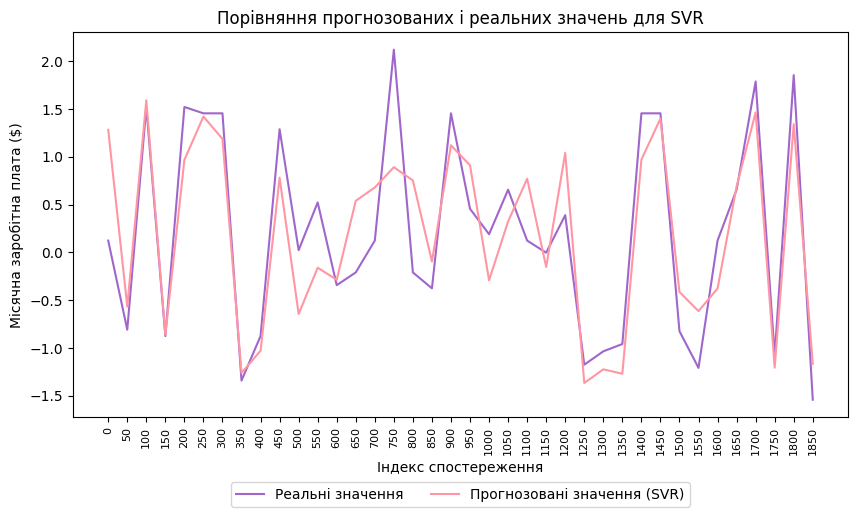

In [337]:
import numpy as np
import matplotlib.pyplot as plt

y_val_pred_svr = svr_model.predict(X_val_scaled)

indexs = np.arange(0, len(y_val_pred_svr), 50)

plt.figure(figsize=(10, 5))
plt.plot(indexs, y_val.values[indexs], label='Реальні значення', color='#A066CB')
plt.plot(indexs, y_val_pred_svr[indexs], label='Прогнозовані значення (SVR)', color='#FF96A3')

plt.xlabel("Індекс спостереження")
plt.xticks(indexs, rotation='vertical', fontsize=8)
plt.ylabel("Місячна заробітна плата ($)")
plt.title("Порівняння прогнозованих і реальних значень для SVR")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.show()


# GridSearchCV SVR()

In [338]:
# from sklearn.svm import SVR
# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)
# X_test_scaled = scaler.transform(X_test)

# param_grid = {
#     'kernel': ['rbf', 'linear'],
#     'C': [0.1, 1, 10],
#     'epsilon': [0.01, 0.1, 0.2]
# }

# grid_search = GridSearchCV(
#     estimator=SVR(),
#     param_grid=param_grid,
#     cv=5,
#     scoring='r2',
#     verbose=1,  # To show progress
#     n_jobs=-1   # Use all available CPU cores
# )

# grid_search.fit(X_train_scaled, y_train)

# best_svr_model = grid_search.best_estimator_
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Найкращі параметри:", best_params)
# print("Найкращий R² Score (середнє значення на крос-валідації):", best_score)

# y_val_pred_svr = best_svr_model.predict(X_val_scaled)
# r2_val = r2_score(y_val, y_val_pred_svr)
# print(f"R² Score на валідаційних даних: {r2_val}")

# y_test_pred_svr = best_svr_model.predict(X_test_scaled)
# r2_test = r2_score(y_test, y_test_pred_svr)
# print(f"R² Score на тестових даних: {r2_test}")

In [339]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import uniform, loguniform
# from sklearn.svm import SVR

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)
# X_test_scaled = scaler.transform(X_test)

# param_dist = {
#    'kernel': ['rbf', 'linear'],
#     'C': [0.1, 1, 10],
#     'epsilon': [0.01, 0.1, 0.2]
# }

# random_search = RandomizedSearchCV(
#     estimator=SVR(),
#     param_distributions=param_dist,
#     n_iter=10,  # Кількість випадкових комбінацій
#     cv=5,
#     scoring='r2',
#     verbose=1,
#     n_jobs=-1,
#     random_state=42
# )

# random_search.fit(X_train_scaled, y_train)

In [340]:
# best_svr_model = random_search.best_estimator_
# best_params = random_search.best_params_
# best_score = random_search.best_score_

# print("Найкращі параметри:", best_params)
# print("Найкращий R² Score (середнє значення на крос-валідації):", best_score)

# y_val_pred_svr = best_svr_model.predict(X_val_scaled)
# r2_val = r2_score(y_val, y_val_pred_svr)
# print(f"R² Score на валідаційних даних: {r2_val}")

# y_test_pred_svr = best_svr_model.predict(X_test_scaled)
# r2_test = r2_score(y_test, y_test_pred_svr)
# print(f"R² Score на тестових даних: {r2_test}")

# XBoost

In [341]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

xgb_model = XGBRegressor(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_train_pred_xgb = xgb_model.predict(X_train)
mse_train_xgb = mean_squared_error(y_train, y_train_pred_xgb)
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)

y_val_pred_xgb = xgb_model.predict(X_val)
mse_val_xgb = mean_squared_error(y_val, y_val_pred_xgb)
r2_val_xgb = r2_score(y_val, y_val_pred_xgb)

y_test_pred_xgb = xgb_model.predict(X_test)
mse_test_xgb = mean_squared_error(y_test, y_test_pred_xgb)
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)

print("________________XGBoost______________________")

print(f"MSE for training data (XGBoost): {mse_train_xgb}")
print(f"MSE for validation data (XGBoost): {mse_val_xgb}")
print(f"MSE for test data (XGBoost): {mse_test_xgb}")

print("______________________________________")

print(f"R² Score for training data (XGBoost): {r2_train_xgb}")
print(f"R² Score for validation data (XGBoost): {r2_val_xgb}")
print(f"R² Score for test data (XGBoost): {r2_test_xgb}")


________________XGBoost______________________
MSE for training data (XGBoost): 0.1546324972334083
MSE for validation data (XGBoost): 0.18609078801914947
MSE for test data (XGBoost): 0.18361269681959835
______________________________________
R² Score for training data (XGBoost): 0.8452308611009332
R² Score for validation data (XGBoost): 0.8150021883643496
R² Score for test data (XGBoost): 0.8165170488954115


# XGBRegressor GridSearch

In [342]:
# from xgboost import XGBRegressor
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import mean_squared_error, r2_score

# xgb_model = XGBRegressor(random_state=42)

In [343]:
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Number of boosting rounds
#     'max_depth': [3, 5, 7],           # Maximum depth of a tree
#     'learning_rate': [0.01, 0.1, 0.2], # Step size shrinkage
#     'subsample': [0.8, 1.0],          # Subsample ratio of the training instances
#     'colsample_bytree': [0.8, 1.0],   # Subsample ratio of columns when constructing each tree
#     'gamma': [0, 0.1, 0.2]            # Minimum loss reduction required to make a split
# }

# grid_search = GridSearchCV(
#     estimator=xgb_model,
#     param_grid=param_grid,
#     cv=5,
#     scoring='r2',
#     verbose=1,  # To show progress
#     n_jobs=-1   # Use all available CPU cores
# )

# grid_search.fit(X_train, y_train)

# best_xgb_model = grid_search.best_estimator_
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Найкращі параметри:", best_params)
# print("Найкращий R² Score (середнє значення на крос-валідації):", best_score)

# # Evaluate the best model on the training set
# y_train_pred_xgb = best_xgb_model.predict(X_train)
# mse_train_xgb = mean_squared_error(y_train, y_train_pred_xgb)
# r2_train_xgb = r2_score(y_train, y_train_pred_xgb)
# print(f"MSE на тренувальних даних (XGBoost): {mse_train_xgb}")
# print(f"R² Score на тренувальних даних (XGBoost): {r2_train_xgb}")

# # Evaluate the best model on the validation set
# y_val_pred_xgb = best_xgb_model.predict(X_val)
# mse_val_xgb = mean_squared_error(y_val, y_val_pred_xgb)
# r2_val_xgb = r2_score(y_val, y_val_pred_xgb)
# print(f"MSE на валідаційних даних (XGBoost): {mse_val_xgb}")
# print(f"R² Score на валідаційних даних (XGBoost): {r2_val_xgb}")

# # Evaluate the best model on the test set
# y_test_pred_xgb = best_xgb_model.predict(X_test)
# mse_test_xgb = mean_squared_error(y_test, y_test_pred_xgb)
# r2_test_xgb = r2_score(y_test, y_test_pred_xgb)
# print(f"MSE на тестових даних (XGBoost): {mse_test_xgb}")
# print(f"R² Score на тестових даних (XGBoost): {r2_test_xgb}")

#StackingRegressor

In [344]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

estimators = [
    ('rf', rf_model),
    ('gb', gb_model),
    # ('dt', dt_model),
    # ('xgb', XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)),
    # ('rf', RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)),
    # ('mlp', MLPRegressor(solver='sgd', max_iter=500, learning_rate_init=0.01, hidden_layer_sizes=(100, 100), alpha=0.01, activation='tanh', random_state=42))
]

stacking_model = StackingRegressor(estimators=estimators, final_estimator=rf_model)
stacking_model.fit(X_train, y_train)

y_train_pred = stacking_model.predict(X_train)
y_val_pred = stacking_model.predict(X_val)
y_test_pred = stacking_model.predict(X_test)

print("_____________Stacking Regressor___________________")
print(f"MSE for training data: {mean_squared_error(y_train, y_train_pred)}")
print(f"MSE for validation data: {mean_squared_error(y_val, y_val_pred)}")
print(f"MSE for test data: {mean_squared_error(y_test, y_test_pred)}")
print(f"R² Score for training data: {r2_score(y_train, y_train_pred)}")
print(f"R² Score for validation data: {r2_score(y_val, y_val_pred)}")
print(f"R² Score for test data: {r2_score(y_test, y_test_pred)}")
print("______________________________________")



_____________Stacking Regressor___________________
MSE for training data: 0.12976682041296897
MSE for validation data: 0.2007339080365775
MSE for test data: 0.195848993415614
R² Score for training data: 0.8701185105827423
R² Score for validation data: 0.8004450725201004
R² Score for test data: 0.8042893987986763
______________________________________


In [345]:
# from lightgbm import LGBMRegressor

# lgb_model = LGBMRegressor(
#     n_estimators=200,
#     learning_rate=0.1,
#     max_depth=5,
#     random_state=42
# )

# lgb_model.fit(X_train, y_train)

# y_train_pred = lgb_model.predict(X_train)
# y_val_pred = lgb_model.predict(X_val)
# y_test_pred = lgb_model.predict(X_test)

# print("_____________LightGBM Regressor___________________")
# print(f"MSE for training data: {mean_squared_error(y_train, y_train_pred)}")
# print(f"MSE for validation data: {mean_squared_error(y_val, y_val_pred)}")
# print(f"MSE for test data: {mean_squared_error(y_test, y_test_pred)}")
# print(f"R² Score for training data: {r2_score(y_train, y_train_pred)}")
# print(f"R² Score for validation data: {r2_score(y_val, y_val_pred)}")
# print(f"R² Score for test data: {r2_score(y_test, y_test_pred)}")
# print("______________________________________")

In [346]:
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import PolynomialFeatures

# poly = PolynomialFeatures(degree=2, include_bias=False)
# X_train_poly = poly.fit_transform(X_train)
# X_val_poly = poly.transform(X_val)
# X_test_poly = poly.transform(X_test)

# lr_model = LinearRegression()
# lr_model.fit(X_train_poly, y_train)

# y_train_pred = lr_model.predict(X_train_poly)
# y_val_pred = lr_model.predict(X_val_poly)
# y_test_pred = lr_model.predict(X_test_poly)

# print("_____________Linear Regression with Polynomial Features___________________")
# print(f"MSE for training data: {mean_squared_error(y_train, y_train_pred)}")
# print(f"MSE for validation data: {mean_squared_error(y_val, y_val_pred)}")
# print(f"MSE for test data: {mean_squared_error(y_test, y_test_pred)}")
# print(f"R² Score for training data: {r2_score(y_train, y_train_pred)}")
# print(f"R² Score for validation data: {r2_score(y_val, y_val_pred)}")
# print(f"R² Score for test data: {r2_score(y_test, y_test_pred)}")
# print("______________________________________")